# Setup

In [1]:
#setup

#numpy libs
import numpy as np

#matplotlib libs
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

#MDAnalysis libs
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF

#other libs
import seaborn as sns
from tqdm.notebook import tqdm
from glob import glob
from natsort import natsorted
import pandas as pd

#my libs
from Silanizer.Grafter.grafter import Grafting
stylize_plot = Grafting.NewSystem.stylize_plot

COLORS = {"water,50":"xkcd:lavender", "water,100":"xkcd:plum",
          "toluene,50":"xkcd:lavender", "toluene,100":"xkcd:plum",
          "water,K0":"xkcd:azure", "water,K1":"xkcd:amber", "water,K2":"xkcd:dark hot pink", "water,K5":"xkcd:seaweed",
          "vacuum,K0":"xkcd:azure", "vacuum,K1":"xkcd:amber", "vacuum,K2":"xkcd:dark hot pink", "vacuum,K5":"xkcd:seaweed",
          "toluene,K0":"xkcd:azure", "toluene,K1":"xkcd:amber", "toluene,K2":"xkcd:dark hot pink", "toluene,K5":"xkcd:seaweed"}

NAMES_BEADS=["DMS","N1P","N1B","N1L","N1L1","W","SW","TW","TOLU","END"]

ATOM_NAMES={"polymer": ["PDMS","DMS"], "bulk": ["BULK","N1B"],"layer": ["LAY","N1L"],"under_polymer": ["PDMS","N1L1"]}

COLORS_BEADS = {"DMS":"xkcd:amber", "END":"xkcd:red", "PDMS":"xkcd:amber", "N1L":"xkcd:gray","N1L1":"xkcd:black","N1B":"xkcd:light gray", "N1P":"xkcd:light gray", "BULK":"xkcd:light gray","LAY":"xkcd:light gray","WALL":"xkcd:light gray", "W":"xkcd:water blue", "SW":"xkcd:water blue", "TW":"xkcd:water blue", "TOLU":"none"}

MASSES = {"TW":36*1.66054E-24,"SW":54*1.66054E-24,"W":72*1.66054E-24,"SC4":54*1.66054E-24,"TC5":36*1.66054E-24,"DMS":72*1.66054E-24}

CMAPS = {"water":"BuPu", "toluene":"YlGn", "octane":"OrRd", "PDMS":"binary", "vacuum":"magma"}

VOLS = {"W":.46**3*1.122, "SW":.41/2**3*1.122, "TW":.35/2**3*1.122, "DMS":.51**3*1.122, "R1":.41/2**3*1.122, 
                "R2":.34**3*1.122, "R3":.34**3*1.122, "OCT":.47**3*2*1.122}


LIMITS = {"water":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,85), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500),
        "50,0.3":(0,50), "50,0.6":(0,75), "50,1.0":(0,85),
        "100,0.3":(0,75), "100,0.6":(0,125), "100,1.0":(0,150)},

        "toluene":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,115), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500),
        "50,0.3":(0,50), "50,0.6":(0,75), "50,1.0":(0,85),
        "100,0.3":(0,50), "100,0.6":(0,125), "100,1.0":(0,150)}}
        
HSPACE = {"water":{"K0,0.1":-0.75, "K0,0.2":-0.75, "K0,0.3":-0.75, "K0,0.6":-0.7, "K0,1.0":-0.75,
        "K1,0.1":-0.75, "K1,0.2":-0.75, "K1,0.3":-0.75, "K1,0.6":-0.7, "K1,1.0":-0.5,
        "K2,0.1":-0.75, "K2,0.2":-0.75, "K2,0.3":-0.7, "K2,0.6":-0.65, "K2,1.0":-0.55,
        "K5,0.1":-0.65, "K5,0.2":-0.55, "K5,0.3":-0.4, "K5,0.6":-0.1, "K5,1.0":0.1,
        "50,0.3":-0.75, "50,0.6":-0.7, "50,1.0":-0.65,
        "100,0.3":-0.7, "100,0.6":-0.6, "100,1.0":-0.55},

        "toluene":{"K0,0.1":-0.75, "K0,0.2":-0.75, "K0,0.3":-0.75, "K0,0.6":-0.7, "K0,1.0":-0.75,
        "K1,0.1":-0.75, "K1,0.2":-0.75, "K1,0.3":-0.75, "K1,0.6":-0.7, "K1,1.0":-0.5,
        "K2,0.1":-0.75, "K2,0.2":-0.75, "K2,0.3":-0.7, "K2,0.6":-0.65, "K2,1.0":-0.55,
        "K5,0.1":-0.65, "K5,0.2":-0.55, "K5,0.3":-0.4, "K5,0.6":-0.1, "K5,1.0":0.1,
        "50,0.3":-0.75, "50,0.6":-0.7, "50,1.0":-0.65,
        "100,0.3":-0.7, "100,0.6":-0.6, "100,1.0":-0.55}}

HRATIOS = {"water":{"K0,0.1":1, "K0,0.2":1, "K0,0.3":1, "K0,0.6":1, "K0,1.0":1,
            "K1,0.1":1, "K1,0.2":1, "K1,0.3":1, "K1,0.6":1, "K1,1.0":1,
            "K2,0.1":1, "K2,0.2":1, "K2,0.3":1, "K2,0.6":1, "K2,1.0":2,
            "K5,0.1":1, "K5,0.2":1, "K5,0.3":1, "K5,0.6":3, "K5,1.0":5.1,
            "50,0.3":1, "50,0.6":2, "50,1.0":2,
            "100,0.3":1, "100,0.6":2, "100,1.0":3},

            "toluene":{"K0,0.1":1, "K0,0.2":1, "K0,0.3":1, "K0,0.6":1, "K0,1.0":1,
            "K1,0.1":1, "K1,0.2":1, "K1,0.3":1, "K1,0.6":1, "K1,1.0":1,
            "K2,0.1":1, "K2,0.2":1, "K2,0.3":1, "K2,0.6":1, "K2,1.0":2,
            "K5,0.1":1, "K5,0.2":1, "K5,0.3":1, "K5,0.6":3, "K5,1.0":5.1,
            "50,0.3":1, "50,0.6":2, "50,1.0":2,
            "100,0.3":1, "100,0.6":2, "100,1.0":3}}

COLOR_SOLV = {"water":"xkcd:water blue", "toluene":"xkcd:algae green", "octane":"xkcd:amber", "vacuum":"xkcd:gray"}

COLOR_SAMPLE = {"K0,0.1":"xkcd:azure", "K1,0.1":"xkcd:amber", "K2,0.1":"xkcd:dark hot pink", "K5,0.1":"xkcd:seaweed",
                "K0,0.2":"xkcd:azure", "K1,0.2":"xkcd:amber", "K2,0.2":"xkcd:dark hot pink", "K5,0.2":"xkcd:seaweed",
                "K0,0.3":"xkcd:azure", "K1,0.3":"xkcd:amber", "K2,0.3":"xkcd:dark hot pink", "K5,0.3":"xkcd:seaweed",
                "K0,0.6":"xkcd:azure", "K1,0.6":"xkcd:amber", "K2,0.6":"xkcd:dark hot pink", "K5,0.6":"xkcd:seaweed",
                "K0,1.0":"xkcd:azure", "K1,1.0":"xkcd:amber", "K2,1.0":"xkcd:dark hot pink", "K5,1.0":"xkcd:seaweed",
                "50,0.3":"xkcd:lavender", "100,0.3":"xkcd:plum",
                "50,0.6":"xkcd:lavender", "100,0.6":"xkcd:plum",
                "50,1.0":"xkcd:lavender", "100,1.0":"xkcd:plum",}

COLOR_NREP = {"50":"xkcd:lavender", "100":"xkcd:plum", "K0":"xkcd:azure", "K1":"xkcd:amber", "K2":"xkcd:dark hot pink","K5":"xkcd:seaweed"}

COLOR_GRADIENT = {"K0,0.1":"xkcd:pale cyan", "K0,0.2":"xkcd:bright sky blue", "K0,0.3":"xkcd:azure", "K0,0.6":"xkcd:azul", "K0,1.0":"xkcd:cobalt blue",
                "K1,0.1":"xkcd:pale gold", "K1,0.2":"xkcd:golden yellow", "K1,0.3":"xkcd:yellowish orange", "K1,0.6":"xkcd:pumpkin orange", "K1,1.0":"xkcd:dark orange",
                "K2,0.1":"xkcd:rosa", "K2,0.2":"xkcd:warm pink", "K2,0.3":"xkcd:dark hot pink", "K2,0.6":"xkcd:dark magenta", "K2,1.0":"xkcd:merlot",
                "K5,0.1":"xkcd:seafoam", "K5,0.2":"xkcd:seaweed", "K5,0.3":"xkcd:seaweed green", "K5,0.6":"xkcd:dark sea green", "K5,1.0":"xkcd:spruce",
                "50,0.3":"xkcd:silver", "50,0.6":"xkcd:gray", "50,1.0":"xkcd:black",
                "100,0.3":"xkcd:lavender", "100,0.6":"xkcd:plum", "100,1.0":"xkcd:plum"}

from matplotlib import font_manager
path_font = [ f for f in font_manager.findSystemFonts(fontpaths="/gpfs/scratch/ehpc13/Fabio/fonts", fontext="ttf") if "Roboto-Regular" in f][0]
font = font_manager.FontEntry(fname=str(path_font), name="Roboto-Regular")
font_manager.fontManager.ttflist.append(font)

# Define font sizes
SIZE_DEFAULT = 10
SIZE_LARGE = 12
plt.rc("font", family=font.name)  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

ModuleNotFoundError: No module named 'Silanizer'

/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.1/run1/water/pull/water_pull.4.part0001.gro
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.1/run1/water/pull/water_pull.4.part0001.xtc
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.2/run1/water/pull/water_pull.1.part0001.gro
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.2/run1/water/pull/water_pull.1.part0001.xtc
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.3/run1/water/pull/water_pull.1.part0001.gro
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.3/run1/water/pull/water_pull.1.part0001.xtc
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.6/run1/water/pull/water_pull.1.part0001.gro
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.6/run1/water/pull/water_pull.1.part0001.xtc
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/1.0/run1/water/pull/water_pull.1.part0001.gro
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/1.0/run1/water/pull/water_pull.1.part0001.xtc


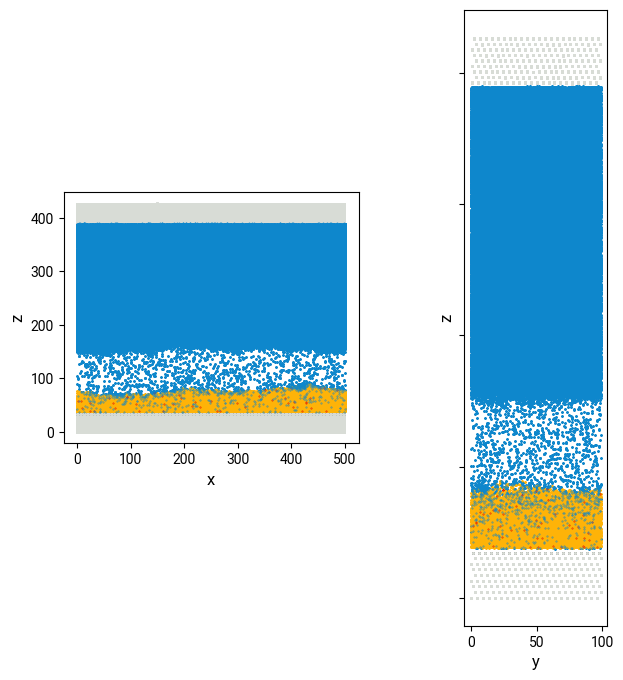

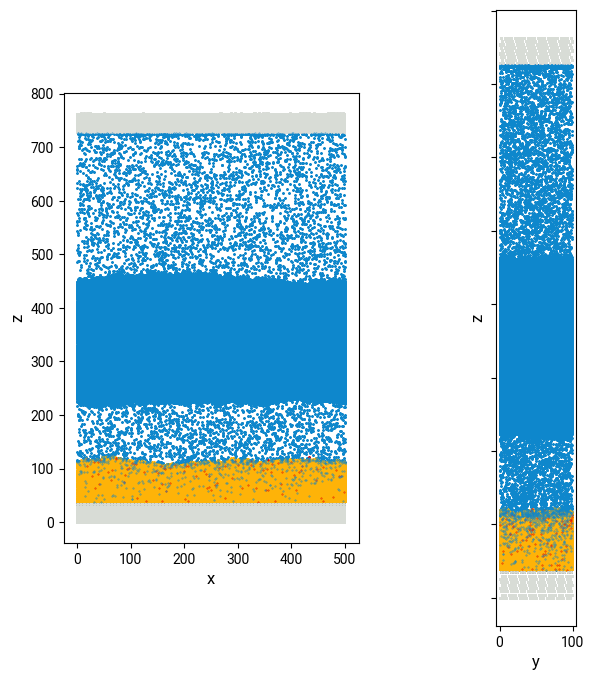

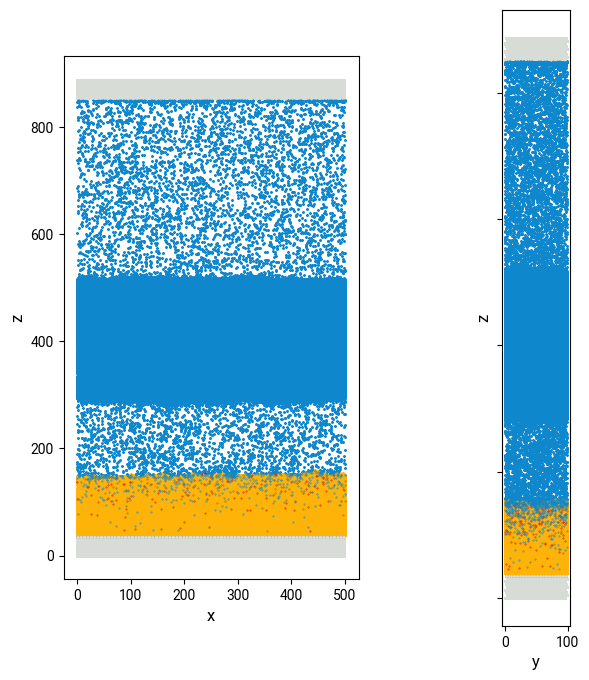

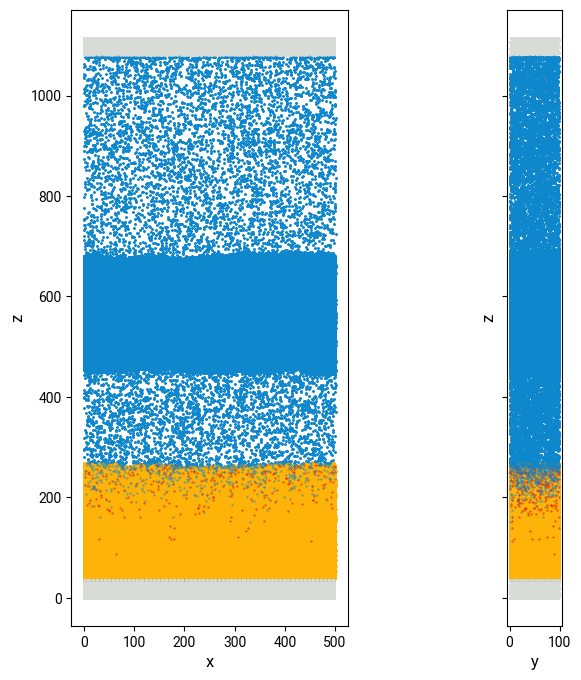

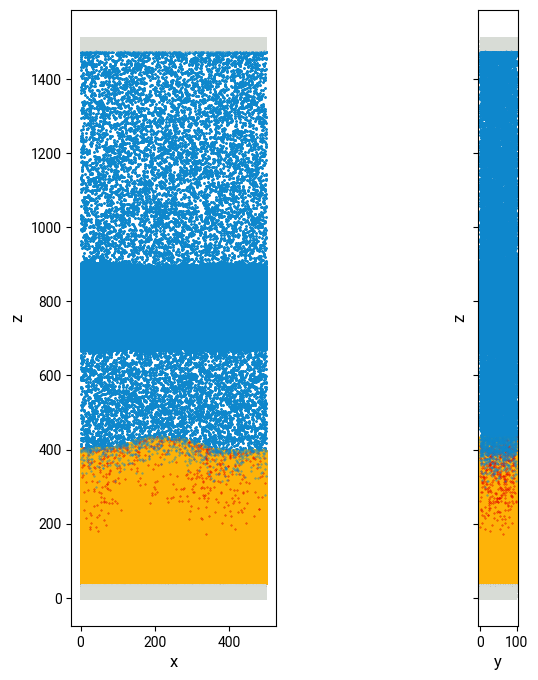

In [5]:
#quick config plot
import re

def rewrite_gro(gro, change_box=False):
    output_file = gro
    modified_lines = []

    with open(gro, "r") as file:
        for line in file:
            if re.match(r'\s*1P', line):
                line = re.sub(r'\bDMS(?=\d|\s)', 'END', line)            
            modified_lines.append(line)

    if change_box:
        x,y,z = modified_lines[-1].split()
        z = str(float(z)+change_box)
        modified_lines[-1] = f"{x} {y} {z}\n"

    with open(output_file, "w") as file:
        file.writelines(modified_lines)

from MDAnalysis.transformations import wrap

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
SYSTEMS = ["300"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1"]
SOLV = "water"
PULL = "/pull"

for SYSTEM in SYSTEMS:
    for DEN in DENS:
        for RUN in RUNS:
            try:
                gro = natsorted(glob(f"{ROOT}/{SYSTEM}/{DEN}/{RUN}/{SOLV}{PULL}/*part*.gro"))[-1]
                traj = natsorted(glob(f"{ROOT}/{SYSTEM}/{DEN}/{RUN}/{SOLV}{PULL}/*part*.xtc"))[-1]
            except Exception as err:
                print(err)
                continue

            print(gro)
            print(traj)
            
            #MySys = Grafting.NewSystem(root=ROOT, gro=gro)
            #molSizes = MySys.get_mol_sizes("DMS","molSizes.dat")
            #MySys.make_itps(molSizes, dict_names=ATOM_NAMES)
            #rewrite_gro(gro)

            MySys = Grafting.NewSystem(root=ROOT, gro=gro)
            u = MySys.universe

            transform = wrap(u.atoms)
            u.trajectory.add_transformations(transform)
            u.trajectory[-1]

            fig,axes = plt.subplots(1,2,figsize=(8,8),sharey=True)
            fig, axes = MySys.plot_system(universe=u, axes=axes, colors=COLORS_BEADS, names=COLORS_BEADS.keys(), s=0.1)
             
            axes[0].set_aspect("equal")
            axes[1].set_aspect("equal")
            plt.subplots_adjust(wspace=0.1, hspace=0)

# Contact Angle

In [ ]:
from MDAnalysis.transformations import wrap

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SYSTEM = "K5"
DEN = 0.3
RUNS = ["run1","run2","run3"]
SOLV = "water"
CUTS = [100,400,20,350]

cangles = []
for RUN in RUNS:

    gro = natsorted(glob(f"{ROOT}/{SYSTEM}/{DEN}/{RUN}/{SOLV}/CA/*part*.gro"))[-1]
    traj = natsorted(glob(f"{ROOT}/{SYSTEM}/{DEN}/{RUN}/{SOLV}/CA/*part*.xtc"))[-2]

    fig, ax = plt.subplots()
    MySys = Grafting.NewSystem(gro=gro, traj=traj)
    u = MySys.universe
    baseLine = u.select_atoms("name DMS").positions[:,2].max()-u.select_atoms("name DMS").positions[:,2].min()+20
    
    figs, thetas = MySys.calc_contact_angle(fig=[fig,ax], solvent="water", nframes=50, axis=[1], baseLine=baseLine, distFromBase=2, contour=True, cmap="coolwarm", cuts=CUTS, tilt=0, molsDict={"DMS":"xkcd:amber"}, delta=-15)
    fig, ax = figs[0]

    cangles.append(thetas)
    ax.set_xlim(CUTS[0],CUTS[1])
    ax.set_ylim(CUTS[2],CUTS[3])

    fig.savefig(f"{ROOT}/plots/density_CA_{SYSTEM}_{DEN}_{RUN}_{SOLV}.png", dpi=350)

cangles = np.array(cangles)
print(cangles)

# Layer structure

water/K0
water/K2
water/K5
toluene/K0
toluene/K2
toluene/K5


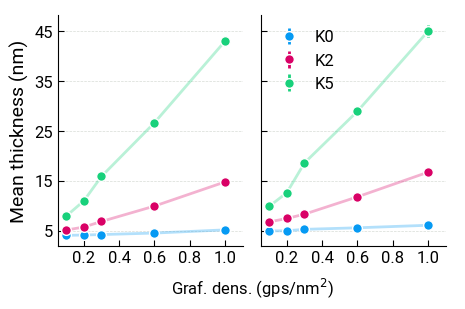

In [38]:
def plot_mean_heights(ax,root,nreps,dens,runs,solv,pullName,colors,marker='o',line='solid',load=False,label=True):

    for nrep in nreps:
        if load is not True:
            dict_out = {"thickness":[],"std_thickness":[],"dens":[],"run":[]}
        print(f"{solv}/{nrep}")

        mean_thicks = []
        for den in dens:
            thicks = []
            if load:
                df = pd.read_csv(f"{root}/out_files/thickness/mean_thickness_{nrep}_{solv}.csv")

            for run in runs:
                if load is not True:
                    file = natsorted(glob(f"{root}/{nrep}/{den}/{run}/{solv}/{pullName}/*part*.gro"))[-1]

                    MySys = Grafting.NewSystem(gro=file)
                    mean_thickness, std_thickness = MySys.calc_LayerHeight(polName="DMS")
                    thicks.append(mean_thickness)
                    
                    dict_out["thickness"].append(mean_thickness)
                    dict_out["std_thickness"].append(std_thickness)
                    dict_out["dens"].append(den)
                    dict_out["run"].append(run)
                else:
                    mean_thickness = df.loc[(df["dens"]==den) & (df["run"]==run),"thickness"].values[0]
                    std_thickness = df.loc[(df["dens"]==den) & (df["run"]==run),"std_thickness"].values[0]
                    thicks.append(mean_thickness)

            mean_thicks.append([den,np.mean(thicks),np.std(thicks)])

        if load is not True:
            df = pd.DataFrame(dict_out)
            df.to_csv(f"{root}/out_files/thickness/mean_thickness_{nrep}_{solv}.csv",index=False)

        mean_thicks = np.array(mean_thicks)
        
        #if load is not True:
        #    df = pd.DataFrame({"dens":mean_thicks[:,0], "thickness":mean_thicks[:,1], "std_thickness":mean_thicks[:,2]})
        #    df.to_csv(f"{root}/out_files/thickness/mean_thickness_{nrep}_{solv}.csv",index=False)

        ax.plot(mean_thicks[:,0], mean_thicks[:,1]*.1, color=COLORS[f"{solv},{nrep}"], ls=line, lw=2, ms=7, alpha=0.3)

        if label:
            label = label=f"{nrep}".replace("50","50 rep.").replace("100","100 rep.")
        else:
            label = ""
        ax.errorbar(mean_thicks[:,0], mean_thicks[:,1]*.1, yerr=mean_thicks[:,2]*.1, color=COLORS[f"{solv},{nrep}"],marker=marker, markeredgecolor="white", markerfacecolor=COLORS[f"{solv},{nrep}"],ls="none", lw=2, ms=7, label=label)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig,axes = plt.subplots(1,2, figsize=(5,3), sharey=True)
#ax1 = inset_axes(axes[1], width="50%", height="40%", bbox_to_anchor=[-0.35,0,1,1], bbox_transform=axes[1].transAxes)

for solv,ls,label,ax in zip(["water","toluene"],["-","-"],[False,True],axes):
    '''ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
    NREPS = ["50","100"]
    DENS = [0.3,0.6,1.0]
    RUNS = ["run1"]
    SOLV = solv
    PULL = "equilibrated"
    LOAD = False

    plot_mean_heights(ax,ROOT,NREPS,DENS,RUNS,SOLV,PULL,COLORS,marker="^",line=ls,load=LOAD,label=label)'''

    LOAD = False
    ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
    NREPS = ["K0","K2","K5"]
    DENS = [0.1,0.2,0.3,0.6,1.0]
    RUNS = ["run1","run2","run3"]
    SOLV = solv
    PULL = "equilibrated"

    plot_mean_heights(ax,ROOT,NREPS,DENS,RUNS,SOLV,PULL,COLORS,marker="o",line=ls,load=LOAD,label=label)

    ax.grid(axis="y", color="xkcd:light grey", linestyle="--", linewidth=0.5)
    ax.set_yticks([5,15,25,35,45])
    ax.set_xticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_xlim(right=1.1)

stylize_plot(axes[0],"","Mean thickness (nm)")
stylize_plot(axes[1],"","")
axes[1].legend(loc="upper left", ncol=1, frameon=False, fontsize=12, handlelength=1.5)

fig.subplots_adjust(wspace=0.1, hspace=0)
ax2 = fig.add_subplot(111, frameon=False)
ax2.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax2.set_xlabel("Graf. dens. (gps/nm$^2$)", size=12)

fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/height_profiles/mean_heights_PolyAndMono_average.svg",dpi=350)

In [ ]:
from scipy.signal import argrelextrema

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

NREPS = ["K0","K1","K2","K5"]
DENS = [0.3,0.6,1.0]
RUNS = ["run1","run2","run3"]
SOLV = "water"
SYSTEMS = [[f"{NREP},{DEN},{RUN},{SOLV}" for DEN in DENS for RUN in RUNS] for NREP in NREPS]

lengths, heights, profiles = {}, {}, {}

for SYSTEM in SYSTEMS:
    fig, ax = plt.subplots()
    for SYS in tqdm(SYSTEM):
        nrep, den, run, solv = SYS.split(",")
        try:
            gro = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{solv}/equilibrated/*part*.gro"))[-1]
        except:
            continue

        MySys = Grafting.NewSystem(gro=gro)
        u = MySys.universe
        monomers = u.select_atoms("name DMS")

        xrange = np.linspace(0,u.dimensions[0],50)
        xprofile = []      
        xvals = []      
        for i in range(len(xrange)-1):
            try:
                cut = monomers.select_atoms(f"prop x > {xrange[i]} and prop x < {xrange[i+1]}")
                xprofile.append(cut.positions[:,2].max())
                xvals.append(cut.positions[:,0].mean())
            except:
                xprofile.append(np.nan)

        toplayer = np.array(xprofile)
        profiles[SYS] = np.column_stack([xvals,toplayer])
        ax.plot(xvals, toplayer, color="xkcd:light gray")   

        minima = argrelextrema(toplayer, np.less,
                                order=10, mode="wrap")
        maxima = argrelextrema(toplayer, np.greater, order=10, mode="wrap")

        #if len(maxima[0]) < 1:
        #    maxima = np.argwhere(toplayer == np.max(toplayer))

        lengths[SYS] = np.abs(xvals[maxima[0][0]] - xvals[minima[0][0]])
        heights[SYS] = np.mean(toplayer[maxima[0]]) - np.mean(toplayer[minima[0]])
        
        for idx in maxima[0]:
            ax.scatter(xvals[idx], toplayer[idx], c="xkcd:tomato")

        for idx in minima[0]:
            ax.scatter(xvals[idx], toplayer[idx], c="xkcd:water blue")

        MySys.stylize_plot(ax,"x (nm)","z (nm)")
        fig.savefig(f"{ROOT}/plots/height_profile_{SYS}.png",dpi=350)

In [ ]:
from matplotlib.lines import Line2D

colors = ["xkcd:tomato", "xkcd:water blue", "xkcd:algae green", "xkcd:amber"]

fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()

DENS = [0.3, 0.6, 1.0]
RUNS = ["run1", "run2", "run3"]

i=0
Hs = []
for DEN in DENS:
    hs, ls = [], []
    for RUN in RUNS:
        SYS = f"K5,{DEN},{RUN},water"
        try:
            hs.append(heights[SYS])
            ls.append(lengths[SYS])
        except:
            continue
    print(np.mean(hs), np.std(hs))
    print(np.mean(ls), np.std(ls))
    ax.errorbar(DEN, np.mean(hs), np.std(hs), marker='o', ls="none", color=colors[i], label=f"K5,{DEN}", ms=5)
    ax1.errorbar(DEN, np.mean(ls), np.std(ls), marker='o', ls="none", color=colors[i], label=f"K5,{DEN}", ms=5)
    Hs.append(np.mean(hs))

dfsave = pd.DataFrame({"dens":DENS, "height":Hs})
dfsave.to_csv(f"{ROOT}/out_files/heights_{NREP}.dat",index=False)


    i += 1
ax.legend(frameon=False)
ax1.legend(frameon=False)

MySys.stylize_plot(ax, "Density (groups/nm$^3$)", "Mean height ($\\AA$)")
MySys.stylize_plot(ax1, "Density (groups/nm$^3$)", "Mean length ($\\AA$)")

fig.savefig(f"{ROOT}/plots/heights_K5.png",dpi=350, bbox_inches="tight")
fig1.savefig(f"{ROOT}/plots/lengths_K5.png",dpi=350, bbox_inches="tight")


In [ ]:
from MDAnalysis.transformations import wrap

NREPS = ["K5"]
DENS = [0.6]
RUNS = ["run4"]
SOLV = "vacuum"
MODE = "nvt"
SYSTEMS = [[f"K5,{DEN},{RUN},{SOLV}" for RUN in RUNS] for DEN in DENS]


def wrap_coordinates(coordinates, box_dimensions):
    wrapped_coordinates = coordinates.copy()
    for i in range(3):
        wrapped_coordinates[:, i] = np.remainder(wrapped_coordinates[:, i], box_dimensions[i])
        wrapped_coordinates[:, i] -= (wrapped_coordinates[:, i] > box_dimensions[i] / 2) * box_dimensions[i]
    return wrapped_coordinates

from scipy.interpolate import griddata
def plot_contour(v, resolution=50, contour_method='linear'):
    x,y,z = v[:,0], v[:,1], v[:,2]
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

for DEN in DENS:
    for RUN in tqdm(RUNS):
        fig, ax = plt.subplots()
        nrep, den, run, solv = "K5", DEN, RUN, "water"
        try:
            gro = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{solv}/{MODE}/*part*.gro"))[-1]
        except:
            continue

        MySys = Grafting.NewSystem(gro=gro)
        u = MySys.universe
        transform = wrap(u.atoms)
        u.trajectory.add_transformations(transform)
        pos = u.select_atoms("name DMS").positions
        pos[:,2] = pos[:,2] - pos[:,2].min()

        X,Y,Z = plot_contour(pos, resolution=200)
        contour = ax.contourf(X,Y,Z, cmap="viridis", levels=np.arange(pos[:,2].min(),pos[:,2].max()+0.01,0.01))
        ax.set_aspect("equal")
        MySys.stylize_plot(ax,"x ($\\AA$)","y ($\\AA$)")
        
        colorbar = fig.colorbar(contour, ax=ax, orientation="horizontal", location="top")
        colorbar.set_label('z $(\\AA)$')

        fig.savefig(f"{ROOT}/plots/height_contour_{nrep}_{den}_{run}_{solv}.png", dpi=350, bbox_inches="tight")


# Roughness

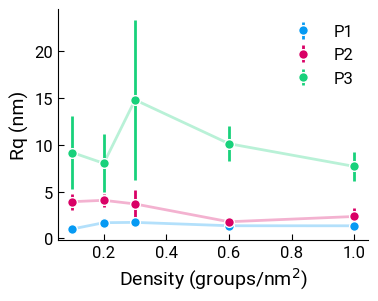

In [37]:
from matplotlib.lines import Line2D

def calculate_r(height, av_height, x):
    A = np.nansum((height - av_height)**2 * x) / (np.nanmax(x) - np.nanmin(x))
    return np.sqrt(A)

# Function to calculate uncertainty in r
def calculate_uncertainty_r(height, av_height, std_height, x):
    A = np.nansum((height - av_height)**2 * x) / (np.nanmax(x) - np.nanmin(x))
    delta_A_av_height = 2 * np.nansum((height - av_height) * x) / (np.nanmax(x) - np.nanmin(x)) * std_height
    delta_A_x = (height - av_height)**2 / (np.nanmax(x) - np.nanmin(x)) * std_height
    delta_A = np.sqrt(delta_A_av_height**2 + np.nansum(delta_A_x**2))
    r = np.sqrt(A)
    delta_r = 0.5 * delta_A / r
    return delta_r

def calc_profiles(SYSTEMS, pull, ax=None, save=False, load=True):
    if load:
        profiles = {}
        for SYSTEM in SYSTEMS:
            for SYS in SYSTEM:
                nrep, den, run, solv = SYS.split(",")
                try:
                    df = pd.read_csv(f"{ROOT}/out_files/height_profiles/height_profile_{SYS}.dat")
                    profiles[SYS] = df.values
                    if ax is not None:
                        ax.plot(df["x"], df["z"], color="xkcd:light gray") 
                except:
                    continue
        return profiles
    
    else:
        profiles = {}
        for SYSTEM in SYSTEMS:
            for SYS in SYSTEM:
                nrep, den, run, solv = SYS.split(",")
                try:
                    gro = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{solv}/{pull}/*part*.gro"))[-1]
                except:
                    continue

                MySys = Grafting.NewSystem(gro=gro)
                u = MySys.universe
                monomers = u.select_atoms("name DMS")

                xrange = np.linspace(0,u.dimensions[0],50)
                xprofile = []      
                xvals = []      
                for i in range(len(xrange)-1):
                    try:
                        cut = monomers.select_atoms(f"prop x > {xrange[i]} and prop x < {xrange[i+1]}")
                        xprofile.append(cut.positions[:,2].max())
                    except:
                        xprofile.append(np.nan)

                    if cut.positions[:,0].size:
                        xvals.append(cut.positions[:,0].mean())
                    else:
                        xvals.append(np.nan)

                toplayer = np.array(xprofile)
                profiles[SYS] = np.column_stack([xvals,toplayer])
                if ax is not None:
                    ax.plot(xvals, toplayer, color="xkcd:light gray") 
                
                df = pd.DataFrame(profiles[SYS], columns=["x","z"])
                df.to_csv(f"{ROOT}/out_files/height_profiles/height_profile_{SYS}.csv",index=False)

        return profiles

def plot_roughness(ax,nreps,dens,runs,solv,colors,profiles,marker="o",line="solid",zorder=1):
    i=0
    
    for nrep in nreps:
        roughness = []
        out = []
        for den in dens:
            rough = []
            for run in runs:
                SYS = f"{nrep},{den},{run},{solv}"
                height = profiles[SYS][:,1]
                x = profiles[SYS][:,0]
                av_height = np.nanmean(height)
                std_height = np.nanstd(height)

                r = calculate_r(height, av_height, x)
                std_r = calculate_uncertainty_r(height, av_height, std_height, x)
                #r = np.sqrt(1/(np.nanmax(x)-np.nanmin(x)) * np.nansum((height-av_height)**2*x))
                
                rough.append(r)
                out.append([den, r, std_r, run])
                #dfsave = pd.DataFrame({"x":x,"av_height":height,"Rq":r})
                #dfsave.to_csv(f"{ROOT}/out_files/roughness/roughness_{SYS}.dat",index=False)
            
            roughness.append([den, np.mean(rough), np.std(rough)])

        roughness = np.array(roughness)
        dfsave = pd.DataFrame(out, columns=["dens","roughness","std_roughness","run"])
        dfsave.to_csv(f"{ROOT}/out_files/roughness/roughness_{nrep}_{SOLV}.csv",index=False)
            
        ax.plot(roughness[:,0], roughness[:,1]*.1, lw=2, color=colors[i], ls=line, zorder=zorder, alpha=0.3)
        ax.errorbar(roughness[:,0], roughness[:,1]*.1, roughness[:,2]*.1, marker=marker, mec="white", color=colors[i], mfc=colors[i], ms=7, ls="none", zorder=zorder, label=nrep.replace("50","M50").replace("100","M100").replace("K0","P1").replace("K2","P2").replace("K5","P3"), lw=2)

        i += 1
    stylize_plot(ax, "Density (groups/nm$^2$)", "Rq (nm)")

fig, ax = plt.subplots(1,1, figsize=(4,3))
SOLV = "water"
PULL = "equilibrated"
LOAD = True

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1","run2","run3"]
SYSTEMS = [[f"{NREP},{DEN},{RUN},{SOLV}" for DEN in DENS for RUN in RUNS] for NREP in NREPS]

profiles = calc_profiles(SYSTEMS, PULL, ax=None, load=LOAD)
plot_roughness(ax,NREPS,DENS,RUNS,SOLV,[COLORS[f"{SOLV},{NREP}"] for NREP in NREPS],profiles,marker="o",line="solid",zorder=1)

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS = ["50","100"]
DENS = [0.3,0.6,1.0]
RUNS = ["run1"]
SYSTEMS = [[f"{NREP},{DEN},{RUN},{SOLV}" for DEN in DENS for RUN in RUNS] for NREP in NREPS]

profiles = calc_profiles(SYSTEMS, PULL,  ax=None, load=LOAD)
#plot_roughness(ax,NREPS,DENS,RUNS,SOLV,[COLORS[f"{SOLV},{NREP}"] for NREP in NREPS],profiles,marker="^",line="-",zorder=3)

ax.legend(frameon=False, ncol=1, columnspacing=0.1, fontsize=12)
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/roughness/roughness_MonoAndPoly_{SOLV}_nomono.svg",dpi=350, bbox_inches="tight")


# Density maps

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmasher as cmr

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS = ["50","100"]
DENS = [0.3,0.6,1.0]
RUNS = ["run1"]
SOLV ="toluene"
MOL = "END"
NFRAMES = 500
PULL = "equilibrated"
cmap_poly = plt.get_cmap('cmr.torch_r')
cmap_end = plt.get_cmap('cmr.torch_r')
CMAP = {"DMS":cmap_poly, "END":cmap_end}
VMAX = {"DMS":0.012, "END":0.0008}
LOAD = False
INSET = False

for NREP in NREPS:
    for DEN in DENS:
        for RUN in RUNS:
            print(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}")

            fig, axes = plt.subplots(2,1, figsize=(6,6), sharex=True, gridspec_kw={'height_ratios':[HRATIOS[SOLV][f"{NREP},{DEN}"],1]})
            ax = axes[0]
            ax1 = axes[1]
            
            if not LOAD:
                gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.gro"))[-1]
                traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.xtc"))[-1]
                MySys = Grafting.NewSystem(gro=gro,traj=traj)

                print(MySys.universe.select_atoms("name END").n_atoms)
                denx, deny, denz, _, _ = MySys.density_profile(MOL, nframes=NFRAMES)
                
                dfdenz = pd.DataFrame(denz)
                dfdenx = pd.DataFrame(denx)
                dfdeny = pd.DataFrame(deny)

                dfdenx.to_csv(f"{ROOT}/out_files/density_profiles/denx_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.dat",index=False)
                dfdeny.to_csv(f"{ROOT}/out_files/density_profiles/deny_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.dat",index=False)
                dfdenz.to_csv(f"{ROOT}/out_files/density_profiles/denz_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.dat",index=False)
            else:
                MySys = Grafting.NewSystem()
                denx = pd.read_csv(f"{ROOT}/out_files/density_profiles/denx_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.dat").values
                deny = pd.read_csv(f"{ROOT}/out_files/density_profiles/deny_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.dat").values
                denz = pd.read_csv(f"{ROOT}/out_files/density_profiles/denz_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.dat").values

            nrows_x = denx.shape[0]
            ncols_x = denx.shape[1]
            nrows_z = denz.shape[0]
            ncols_z = denz.shape[1]

            ax.tick_params(which='major', length=0, labelsize=12)
            ax1.tick_params(which='major', length=0, labelsize=12)

            img1 = ax.imshow(denx*0.001, cmap=CMAP[MOL], aspect="equal", interpolation="bicubic", alpha=1.0, origin="lower", vmin=0, vmax=VMAX[MOL]*0.001, extent=[0,ncols_x*0.1,0,nrows_x*0.1])
            img2 = ax1.imshow(denz*0.001, cmap=CMAP[MOL], aspect="equal", interpolation="bicubic", alpha=1.0, origin="lower", vmin=0, vmax=VMAX[MOL]*0.001, extent=[0,ncols_z*0.1,0,nrows_z*0.1])

            divider = make_axes_locatable(ax)
            cax = divider.append_axes('top', size=0.1, pad=0)
            cbar = fig.colorbar(img1, cax=cax, orientation='horizontal', location='top')
            cbar.ax.set_xlabel("Avg. density ($nm^{-2}$)", size=12, labelpad=10)
            cbar.ax.tick_params(labelsize=12)

            ax.set_ylabel("z (nm)", size=12)
            ax1.set_xlabel("x (nm)", size=12); ax1.set_ylabel("y (nm)", size=12)

            if INSET:
                if not LOAD:
                    z_SOLV, z_POLY = MySys.position_hist(mol=MOL, nframes=NFRAMES)
                    kde1, kde2 = MySys.calc_kde(z_SOLV=z_SOLV, z_POLY=z_POLY, solvent=SOLV, save=True, outROOT=f"{ROOT}/out_files/density_profiles", system=f"{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}")
                else:
                    kde1 = pd.read_csv(f"{ROOT}/out_files/density_profiles/kde_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}_poly.dat")
                    kde2 = pd.read_csv(f"{ROOT}/out_files/density_profiles/kde_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}_solv.dat")
                    axin = ax.inset_axes([0.31, 0.7, 0.55, 0.25])

                
                MySys.plot_kde(axin, kde1["z"], kde1["vol_frac"], "xkcd:gray", label=f"{NREP},{DEN}", fill=False, zorder=1, alpha=0.2, ls="solid")
                MySys.plot_kde(axin, kde2["z"], kde2["vol_frac"], COLOR_SOLV[SOLV], label=f"{SOLV}", fill=False, zorder=1, alpha=0.2, ls="dashed")
                axin.tick_params(which='major', length=3, direction="out", labelsize=6)
                axin.set_xlabel("z ($\\AA$)",fontsize=9,labelpad=0.01)
                axin.set_ylabel("Vol. frac.",fontsize=9,labelpad=0.01)
                #axin.set_xlim(0,lims_inset[f"{nrep},{den}"])

            ax.set_ylim(np.array(LIMITS[SOLV][f"{NREP},{DEN}"])*0.1)
            ax1.set_ylim(0,10)
            ax1.set_xlim(0,50)

            fig.subplots_adjust(hspace=HSPACE[SOLV][f"{NREP},{DEN}"],wspace=0)
            fig.savefig(f"{ROOT}/plots/density_profiles/{MOL}_dens_{NREP}_{DEN}_{SOLV}_{RUN}.svg", dpi=350)
            fig.savefig(f"{ROOT}/plots/density_profiles/{MOL}_dens_{NREP}_{DEN}_{SOLV}_{RUN}.png", dpi=350)

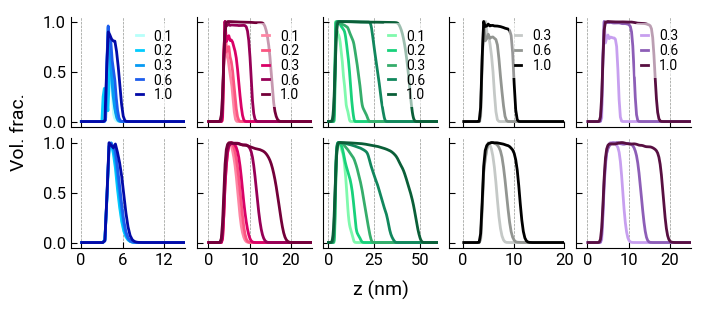

In [136]:
COLOR_GRADIENT = {"K0,0.1":"xkcd:pale cyan", "K0,0.2":"xkcd:bright sky blue", "K0,0.3":"xkcd:azure", "K0,0.6":"xkcd:azul", "K0,1.0":"xkcd:cobalt blue",
                "K1,0.1":"xkcd:pale gold", "K1,0.2":"xkcd:golden yellow", "K1,0.3":"xkcd:yellowish orange", "K1,0.6":"xkcd:pumpkin orange", "K1,1.0":"xkcd:dark orange",
                "K2,0.1":"xkcd:rosa", "K2,0.2":"xkcd:warm pink", "K2,0.3":"xkcd:dark hot pink", "K2,0.6":"xkcd:dark magenta", "K2,1.0":"xkcd:merlot",
                "K5,0.1":"xkcd:seafoam", "K5,0.2":"xkcd:seaweed", "K5,0.3":"xkcd:seaweed green", "K5,0.6":"xkcd:dark sea green", "K5,1.0":"xkcd:spruce",
                "50,0.3":"xkcd:silver", "50,0.6":"xkcd:gray", "50,1.0":"xkcd:black",
                "100,0.3":"xkcd:lavender", "100,0.6":"xkcd:deep lavender", "100,1.0":"xkcd:plum"}

def plot_volfrac(axes, ROOT, NREPS, DENS, SOLVS, RUNS, load=True, plotSolv=False):
    for i,NREP in enumerate(NREPS):
        for DEN in DENS:
            for SOLV in SOLVS:
                kdePoly, kdeSolv = [],[]   
                for RUN in RUNS:
                    if not load:
                        gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.gro"))[-1]
                        traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.xtc"))[-1]
                        
                        MySys = Grafting.NewSystem(gro=gro,traj=traj)
                        z_SOLV, z_POLY = MySys.position_hist(mol=MOL, nframes=NFRAMES)

                        kde1, kde2 = MySys.calc_kde(z_SOLV=z_SOLV, z_POLY=z_POLY, solvent=SOLV, save=True, outROOT=f"{ROOT}/out_files/density_profiles", system=f"{NREP}_{DEN}_{SOLV}_{RUN}")
                    else:
                        MySys = Grafting.NewSystem()
                        kde1 = pd.read_csv(f"{ROOT}/out_files/density_profiles/kde_{NREP}_{DEN}_{SOLV}_{RUN}_poly.dat").values
                        if plotSolv:
                            kde2 = pd.read_csv(f"{ROOT}/out_files/density_profiles/kde_{NREP}_{DEN}_{SOLV}_{RUN}_solv.dat").values

                    kdePoly.append(kde1)
                    if plotSolv:
                        kdeSolv.append(kde2)

                kdePoly = np.array(kdePoly)
                kdePolyMean = np.mean(kdePoly, axis=0)
                if plotSolv:
                    kdeSolv = np.array(kdeSolv)
                    kdeSolvMean = np.mean(kdeSolv, axis=0)

                MySys.plot_kde(axes[SOLV][i], kdePolyMean[:,0], kdePolyMean[:,1], COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{DEN}", fill=False, zorder=1, alpha=0.2, ls="solid")
                if plotSolv:
                    MySys.plot_kde(axes[SOLV][i], kdeSolvMean[:,0], kdeSolvMean[:,1], "xkcd:water blue", label=f"{SOLV}", fill=False, zorder=1, alpha=0.2, ls="dashed")
                
                axes[SOLV][i].set_ylabel("")
                axes[SOLV][i].set_xlabel("")
                axes[SOLV][i].grid(True, axis='x',color="xkcd:gray", linestyle="--", linewidth=0.5)
                axes[SOLV][i].set_xlim(right=LIMS[f"{NREP},{DEN},{SOLV}"]*0.1)
                MySys.stylize_plot(axes[SOLV][i], "", "")

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLVS = ["water","toluene"]
RUNS = ["run1","run2","run3"]
MOL = "DMS"
NFRAMES = 50
LOAD = True

fig, axes = plt.subplots(2,5,figsize=(8,3),sharey=True, sharex='col')
flataxes = axes.flatten("C")
axes_poly = {"water":flataxes[:3], "toluene":flataxes[5:-2]}

plot_volfrac(axes_poly, ROOT, NREPS, DENS, SOLVS, RUNS, load=LOAD)
for i in range(len(axes_poly["water"])):
    axes_poly["water"][i].legend(frameon=True, loc="upper right", framealpha=0.6, fontsize=10, labelspacing=0.05, handlelength=0.5, facecolor="white", edgecolor="none")

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS = ["50","100"]
DENS = [0.3,0.6,1.0]
SOLVS = ["water","toluene"]
RUNS = ["run1"]
MOL = "DMS"
NFRAMES = 50

axes_mono = {"water":flataxes[3:5], "toluene":flataxes[-2:]}
plot_volfrac(axes_mono, ROOT, NREPS, DENS, SOLVS, RUNS, load=LOAD)
for i in range(len(axes_mono["water"])):
    axes_mono["water"][i].legend(frameon=True, loc="upper right", framealpha=0.6, fontsize=10, labelspacing=0.05, handlelength=0.5, facecolor="white", edgecolor="none")

flataxes[0].set_xticks([0,6,12])
flataxes[1].set_xticks([0,10,20])
flataxes[2].set_xticks([0,25,50])
flataxes[3].set_xticks([0,10,20])
flataxes[4].set_xticks([0,10,20])

ax_frame = fig.add_subplot(111, frameon=False)
ax_frame.set_xlabel("z (nm)", size=14)
ax_frame.set_ylabel("Vol. frac.", size=14)
ax_frame.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/density_profiles/comparison_density_profiles.svg", dpi=350, bbox_inches="tight")

# Single molecule analysis

In [ ]:
#<R(n)^2>/n

def extract_sequences(arr):
    sequences = []
    current_sequence = []

    for i in range(len(arr)):
        if i > 0 and arr[i] != arr[i - 1] + 1:
            sequences.append(current_sequence)
            current_sequence = []

        current_sequence.append(arr[i])

    # Append the last sequence
    if current_sequence:
        sequences.append(current_sequence)

    return sequences

import subprocess
from MDAnalysis.analysis.distances import self_distance_array as dist
from MDAnalysis.transformations import NoJump

NREPS = ["K5"]
DENS = [0.6]
SOLV = "water"
RUNS = ["run1","run2","run3"]
SYSTEMS = [[f"{nrep},{den},{run}" for nrep in NREPS] for den in DENS for run in RUNS]
dist_n = {}

for system in SYSTEMS:

    for sys in system:
        nrep,den,run = sys.split(",")
    
        filenames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*.part*.gro"))
        trajnames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*nojump*.xtc"))

        try:
            gro = filenames[-1]
            traj = trajnames[-1]
        except:
            continue

        command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
        subprocess.run(f"cd {ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated;"+
                        command,
                        shell=True, executable="/bin/bash")
        
        df = pd.read_csv(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
        u = mda.Universe(gro,traj)

        pdms = u.select_atoms("name DMS")
        indices = pdms.indices

        resnames = [f"resname P{num} " for num in df["nmol"].values ]
        molSizes = [int(s.split("P")[1]) for s in resnames]
        maxMolSize = np.max(molSizes)

        dist_n[sys] = {m:[] for m in range(1,maxMolSize+1)}

        for ts in u.trajectory[-10:]:
            positions = {}
            for resname in resnames[:]:

                indices = u.select_atoms(f"{resname}").indices
                sequence = extract_sequences(indices)
                positions[resname.split(" ")[1]] = []

                for seq in sequence:
                    
                    monomers = u.select_atoms(f"index {seq[0]}:{seq[-1]}")
                    pos = monomers.positions
                    positions[resname.split(" ")[1]].append(pos)

                    dists = dist(monomers, backend="OpenMP")
                    lenMol = len(monomers)

                    i = 0
                    for j in range(lenMol-1,1,-1):
                        dists_cut = dists[i:i+j]
                        k = 1
                        for l in dists_cut:
                            dist_n[sys][k].append(l)
                            k += 1
                        i += j

In [ ]:

COLORS = ["xkcd:cornflower","xkcd:algae green","xkcd:raspberry","xkcd:amber"]
for system in SYSTEMS:
    fig, ax = plt.subplots()
    i=0
    for sys in system:
        Rs = []
        for key in dist_n[sys].keys():
            meanR2 = np.mean([(d*0.1)**2 for d in dist_n[sys][key]])/key
            Rs.append(meanR2)
        ns = dist_n[sys].keys()
        df = pd.DataFrame({"n":ns,"R":Rs})
        df.to_csv(f"{ROOT}/out_files/R2_{sys}.dat",index=False)
        df.plot(x="n", y="R", ax=ax, label=sys, color=COLORS[i])
            
        i+=1

    ax.set_xscale("log")
    ax.legend(frameon=False)
    MySys.stylize_plot(ax,"$n$","$\\langle R(n)^2 \\rangle/n$")
    fig.savefig(f"{ROOT}/plots/R2_n_{sys}.png" ,dpi=350, bbox_inches="tight")


In [ ]:
from MDAnalysis.transformations import wrap
import subprocess
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

def get_molSizes(folder, SOLV):
    command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
    subprocess.run(f"cd {folder};"+
                        command,
                        shell=True, executable="/bin/bash")

def plot_histograms(ax2, df, color, limits):
    ax1.spines['right'].set_visible(True)
    ax1.spines['top'].set_visible(True)
    ax1.set_xlim(-0.5,50.5)
    ax1.set_ylim(bottom=-0.5)
    y1, y2 = ax1.get_ylim()

    ax2.hist(df["z"]*.1, bins=500, density=True, range=limits, orientation="horizontal", color=color, alpha=0.6, histtype="stepfilled")
    ax2.hist(df["z"]*.1, bins=500, density=True, range=limits, orientation="horizontal", color=color, alpha=1, histtype="step")

    ax2.set_xticks([])
    ax2.set_yticklabels([])
    ax2.set_ylim(y1, y2)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "toluene"
RUNS = ["run1","run2","run3"]
FRAMES = [-1]

import matplotlib
cmap = matplotlib.colormaps['Spectral_r']
colors_dens = cmap(np.linspace(0, 1, 6))

LcutList = {}
for NREP in NREPS:
    for DEN in DENS:
        for RUN in RUNS:
            for frame in FRAMES:
                # Create a 1x2 grid with a width ratio of 3:1
                fig = plt.figure(figsize=(6, 3))
                gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1])

                gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.gro"))[-1]
                traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*nojump*.xtc"))[-1]

                get_molSizes(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated", SOLV)
                df_molsizes = pd.read_csv(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
                MySys = Grafting.NewSystem(gro=gro, traj=traj, molSizes=df_molsizes["nmol"].sort_values().values)

                transform = wrap(MySys.universe.atoms)
                MySys.universe.trajectory.add_transformations(transform)
                MySys.universe.trajectory[-1]
                universe = MySys.universe
                u = universe.select_atoms("name DMS")

                df = pd.DataFrame({"x":u.atoms.positions[:,0], "y":u.atoms.positions[:,1], "z":u.atoms.positions[:,2], "lengths":[int(r[1:]) for r in u.atoms.residues.resnames]})
                df["z"] -= df["z"].min()
                # Plot the main plot on the left
                ax1 = plt.subplot(gs[0])
                im = ax1.scatter(df["x"]*.1, df["z"]*.1, c=df["lengths"], cmap=cmap, alpha=1, s=0.1)
                
                # Plot the histogram on the right
                ax2 = plt.subplot(gs[1])

                maxL = df["lengths"].max()
                Lcuts = np.linspace(0,maxL,6)
                LcutList[f"{NREP,DEN,RUN}"] = Lcuts

                for i in range(len(Lcuts)-1):
                    cut = df[((df["lengths"] >= Lcuts[i])) & (df["lengths"] <= Lcuts[i+1])]
                    plot_histograms(ax2, cut, colors_dens[i+1], limits=(df["z"].min(),df["z"].max()))

                divider = make_axes_locatable(ax1)
                cax = divider.append_axes('top', size=0.1, pad=0)
                cbar = fig.colorbar(im, cax=cax, orientation='horizontal', location='top')
                cbar.ax.set_xlabel("Chain length (# monomers)", size=12, labelpad=10)
                cbar.ax.tick_params(labelsize=12)
                stylize_plot(ax1,"x (nm)","z (nm)")

                fig.subplots_adjust(wspace=0)
                fig.savefig(f"{ROOT}/plots/chain_lengths/chain_lengths_{NREP}_{DEN}_{RUN}_{SOLV}.png", dpi=350, bbox_inches="tight")
                fig.savefig(f"{ROOT}/plots/chain_lengths/chain_lengths_{NREP}_{DEN}_{RUN}_{SOLV}.svg", dpi=100, bbox_inches="tight")


In [ ]:
from Silanizer.Grafter.grafter import Grafting
import matplotlib.colors as mcolors

def make_colors_list(nframes, base_colors):
    color_lists = []

    for i in range(nframes):
        color_list = []
        for base_color in base_colors:
            intensity = 1 - i * 1/nframes
            color = mcolors.colorConverter.to_rgb(base_color)
            new_color = tuple(c * intensity for c in color)
            color_list.append(new_color)
        color_lists.append(color_list)

    color_lists_reversed = color_lists[::-1]
    return color_lists_reversed

NREPS = ["K5"]
DENS = [0.6]
SOLV = "water"
RUNS = ["run1"]
SYSTEMS = [[f"{nrep},{den},{run}" for nrep in NREPS] for den in DENS for run in RUNS]
FRAMES = [-1]

base_colors = ['xkcd:raspberry', 'xkcd:water blue', 'xkcd:violet', 'xkcd:amber', 'xkcd:teal']
color_lists = make_colors_list(len(FRAMES), base_colors)

CHAINS = ['P150']

for system in SYSTEMS:
    for sys in system:  
        for frame,color_list in zip(FRAMES,color_lists):
            fig,axes = plt.subplots(1,2,figsize=(8,3),sharey=True)
            fig3D = plt.figure(figsize=(10,5))
            ax3D = fig3D.add_subplot(111, projection='3d')
            colors = {chain:color for chain,color in zip(CHAINS,color_list)}
            nrep, den, run = sys.split(",")

            gro = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/pull_new/*part*.gro"))[-1]
            traj = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/pull_new/*nojump*.xtc"))[-1]

            MySys = Grafting.NewSystem(gro=gro, traj=traj)
            axes, ax3D, resnames, positions = MySys.plot_chains(atomName="DMS", chains=CHAINS, frame=frame, polName="PDMS", numOfChains=5, plot3D=True, ax3D=ax3D, axes=axes, colors=colors)


In [39]:
#util libs
import numpy as np
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.options.mode.chained_assignment = None 

from mpl_toolkits.mplot3d import Axes3D

from MDAnalysis.transformations import wrap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

ROOT = "/Users/frasera/Ricerca/PDMS/Polydisperse"
NREPS = ["K5"]
DENS = [0.6]
SOLV = "water"
RUNS = ["run1"]

import matplotlib
from matplotlib import cm

cmap = matplotlib.colormaps['Spectral_r']

LcutList = {}

for NREP in NREPS:

    df = pd.read_csv(f"{ROOT}/out_files/chain_length/chains_{NREP}_{DEN}_{RUN}_{SOLV}.csv")
    print(df['id'].unique())
    print(df['lengths'].unique())
    
    first_occurrences = df.drop_duplicates(subset='lengths', keep='first')
    first_ids = first_occurrences['id']
    df = df[df['id'].isin(first_ids)]
    
    norm = matplotlib.colors.Normalize(vmin=0, vmax=df["lengths"].max())
    lengths = df['lengths'].unique()

    print(lengths)

    color_discrete_map={l:c/255 for l,c in zip(lengths,cm.Spectral_r(norm(lengths),bytes=True))}

    fig = px.scatter_3d(df, x='x', y='y', z='z',color='lengths', color_discrete_sequence=px.colors.qualitative.Alphabet, color_discrete_map=color_discrete_map)
    fig.update_traces(marker=dict(size=2))


#divider = make_axes_locatable(ax)
#cax = divider.append_axes('top', size=0.1, pad=0)
#cbar = plt.colorbar(im, cax=cax, orientation='horizontal', location='top')
#cbar.ax.set_xlabel("Chain length (nm)", size=12, labelpad=10)
#cbar.ax.tick_params(labelsize=12)
    fig.show()
#fig.savefig(f"{ROOT}/plots/chains_in_box_{NREP}_{DEN}_{RUN}_{SOLV}.png", dpi=350, bbox_inches="tight")
            #plt.savefig(f"{ROOT}/plots/chain_lengths_{NREP}_{DEN}_{RUN}_{SOLV}.svg", dpi=100, bbox_inches="tight")


[ 46 122 241]
[ 77.  137.5 511. ]
[ 77.  137.5 511. ]


# MSD

In [ ]:
#plot_msd
from matplotlib.lines import Line2D

def roll_av(df_msd, n):
    std = pd.DataFrame()
    roll = pd.DataFrame()

    roll["MSD"] = df_msd["MSD"].rolling(window=n).mean().dropna()
    roll["z"]= df_msd["z"].rolling(window=n).mean().dropna()
    std["MSD"] = df_msd["MSD"].rolling(window=n).std().dropna()
    roll["z"] = (roll["z"]-roll["z"].min())/(roll["z"].max()-roll["z"].min())
    std["z"] = roll["z"].values

    return roll, std

def plot_hists(ax1, ax1_histx, ax1_histy, df_msd, color, zorder=1):
    hist,bins = np.histogram(df_msd["z"],bins=np.linspace(0,1,50))
    weights = [1.0/np.max(hist)]*len(df_msd)
    ax1_histx.hist(df_msd["z"], bins=np.linspace(0,1,50), weights=weights, alpha=0.5, edgecolor="none", facecolor=color,zorder=zorder)

    hist,bins = np.histogram(df_msd["MSD"],bins=np.logspace(1,3.5))
    weights = [1.0/np.max(hist)]*len(df_msd)
    ax1_histy.hist(df_msd["MSD"], bins=np.logspace(1,3.5), weights=weights, orientation='horizontal', alpha=0.5, color=color,zorder=zorder)

    ax1.set_yscale("log"); ax1_histy.set_yscale("log")
    ax1_histx.set_xlim(ax1.get_xlim()); ax1_histy.set_ylim(ax1.get_ylim())
    ax1_histy.set_xticks([]); ax1_histx.set_yticks([])
    ax1_histy.set_yticklabels([]); ax1_histx.set_xticklabels([])
    ax1_histx.spines["left"].set_visible(False); ax1_histy.spines["bottom"].set_visible(False)
    ax1.set_ylim((10,1500))


def plot_positions(ax, df_pos_all, vmin=0, vmax=1000, ylim=(0,500)):
    df_pos_all["z"] = df_pos_all["z"] - df_pos_all["z"].min()
    im1 = ax[0].scatter(df_pos_all["x"], df_pos_all["z"], c=df_pos_all["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=8, alpha=1, zorder=1, vmin=vmin, vmax=vmax)
    im2 = ax[1].scatter(df_pos_all["x"], df_pos_all["y"], c=df_pos_all["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=8, alpha=1, zorder=1, vmin=vmin, vmax=vmax)
    MySys.stylize_plot(ax[0],"","z ($\\AA$)")
    MySys.stylize_plot(ax[1],"","y ($\\AA$)")

    ax[0].set_xlim(0,500); ax[0].set_ylim(ylim)
    ax[1].set_xlim(0,500); ax[1].set_ylim(0,100)
    ax[0].set_aspect("equal"); ax[1].set_aspect("equal")

    return im1, im2

def plot_roll(ax1, df_msd, color, n=500, zorder=-1, label=""):
    roll, std = roll_av(df_msd, n)
    ax1.plot(roll["z"], roll["MSD"], ls ="solid", c="white", zorder=i, lw=3.5)
    ax1.plot(roll["z"], roll["MSD"], ls ="solid", c=color, zorder=i, lw=2.5, label=label)
    ax1.fill_between(roll["z"], roll["MSD"]-std["MSD"], roll["MSD"]+std["MSD"], alpha=0.2, color=color, edgecolor="none", zorder=zorder)
    ax1.legend(frameon=False, loc="upper right", handlelength=1)    


def plot_msd_time(ax2, ax2_inset, df_msd_time, color, n=-100):
    ax2.plot(df_msd_time["time"][:n], df_msd_time["MSD"][:n], label=f"{nrep},{den}", lw=3, color=color)
    ax2.legend(frameon=False, loc="lower right", edgecolor="xkcd:light gray", facecolor="white", framealpha=0.6)
    D = MySys.diffusivity(df_msd_time["time"]*.001, df_msd_time["MSD"], 0, 3)
    ax2_inset.scatter(nrep, D, marker="o", color=color)

def stylize_plots(ax1, ax1_histy, ax1_histx, ax2, ax2_inset, fig, axes, im3, system):
    MySys.stylize_plot(ax1,"(z-z$_{min}$)/(z$_{max}$-z$_{min}$) ($\\AA$)","MSD ($\\AA^2$)")
    MySys.stylize_plot(ax1_histy,"",""); MySys.stylize_plot(ax1_histx,"","")
    MySys.stylize_plot(ax2,"t (ps)","MSD ($\\AA^2$)")
    MySys.stylize_plot(ax2_inset,"","D ($\\AA^2$/ns)",labelsize=10,ticksize=10)

    axes[0,0].set_ylabel("z ($\\AA$)", size=12)
    axes[0,1].set_ylabel(""); axes[0,2].set_ylabel("")
    axes[1,0].set_ylabel("y ($\\AA$)", size=12)
    axes[1,1].set_ylabel(""); axes[1,2].set_ylabel("")
    
    ax_fig = fig.add_subplot(111, frameon=False)
    ax_fig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax_fig.set_xlabel("x ($\\AA$)", size=12)
    ax_fig.set_ylabel("", size=12)

    cbar_ax = fig.add_axes([0.83, 0.3, 0.015, 0.4])
    fig.colorbar(im3, cax=cbar_ax, extend='max', label="MSD ($\\AA^2$)")

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
RUNS = ["run1"]
NREPS = ["50","100"]
DENS = [0.3,0.6,1.0]
SOLV = "water"
NFRAMES = 200
MARKERS = ["o","s","^","D"]
SYSTEMS = [[f"{nrep},{den},{run}" for nrep in NREPS] for den in DENS for run in RUNS]
LOAD = False

for system in SYSTEMS:
    fig,axes = plt.subplots(2,3,figsize=(8,5), sharex=True, sharey="row", height_ratios=(3,1))
    fig1 = plt.figure()
    fig2,ax2 = plt.subplots()
    ax2_inset = fig2.add_axes([0.2, 0.65, 0.25, 0.2])

    # Create the Axes for border histograms
    gs = fig1.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
    ax1 = fig1.add_subplot(gs[1, 0])
    ax1_histx = fig1.add_subplot(gs[0, 0])
    ax1_histy = fig1.add_subplot(gs[1, 1])
    
    i=0
    for sys in system:
        nrep,den,run = sys.split(",")
        print(f"System: {nrep} / density: {den} /  Run: {run}")
        
        if not LOAD:
            gros = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*part*.gro"))
            trajs = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*nojump*.xtc"))
            MySys = Grafting.NewSystem(gro=gros[-1], traj=trajs[-1])
            u = MySys.universe

            df_pos_all, df_pos_close, df_msd_time = MySys.calc_MSD(polyname="DMS", nframes=NFRAMES)
            df_pos_all = df_pos_all[(df_pos_all["x"]>0) & (df_pos_all["x"]<500) & (df_pos_all["y"]>0) & (df_pos_all["y"]<100)]

            df_msd = df_pos_all.copy().sort_values("z")
            df_msd["z"] = (df_msd["z"]-df_msd["z"].min())/(df_msd["z"].max()-df_msd["z"].min())

            df_msd.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_{sys}.dat",index=False)
            df_msd_time.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_time_{sys}.dat",index=False)
            df_pos_all.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/positions_{sys}.dat",index=False)

        else:
            MySys = Grafting.NewSystem()
            df_msd = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_{sys}.dat")
            df_msd_time = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_time_{sys}.dat")
            df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/positions_{sys}.dat")

        #plot MSD x time
        plot_msd_time(ax2, ax2_inset, df_msd_time, COLOR_NREP[nrep], n=-10)        

        #plot histograms
        plot_roll(ax1, df_msd, COLOR_NREP[nrep], 500, zorder=-i, label=nrep)
        plot_hists(ax1, ax1_histx, ax1_histy, df_msd, COLOR_NREP[nrep], zorder=-i)

        #plot positions with MSD
        im1, im2 = plot_positions(axes[:,i], df_pos_all, 0, 600, (0,300))
        i += 1

    stylize_plots(ax1, ax1_histy, ax1_histx, ax2, ax2_inset, fig, axes, im2, system)
    fig.subplots_adjust(hspace=0.2, wspace=0.3, right=0.8, left=0.1, top=0.7, bottom=0.3)

    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_pos_{den}_{run}_allbeads.svg", dpi=350, bbox_inches='tight')
    fig1.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_hist_{den}_{run}_allbeads.svg", dpi=350, bbox_inches='tight')
    fig2.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_{den}_{run}_time_allbeads.svg", dpi=350, bbox_inches='tight')

    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_pos_{den}_{run}_allbeads.png", dpi=350, bbox_inches='tight')
    fig1.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_hist_{den}_{run}_allbeads.png", dpi=350, bbox_inches='tight')
    fig2.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_{den}_{run}_time_allbeads.png", dpi=350, bbox_inches='tight')


In [ ]:
#calculate and plot_msd by positions

def plot_positions(axes, df_pos_all, df_pos_close, vertlines=False, vmin=0, vmax=1000, ylim=(0,500)):
   
    axes[0].scatter(df_pos_all["x"], df_pos_all["z"], c="xkcd:light gray", marker="o", edgecolor="xkcd:gray", facecolor="xkcd:light gray", s=12, alpha=0.3, zorder=-1)
    im1 = axes[0].scatter(df_pos_close["x"], df_pos_close["z"], c=df_pos_close["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=10, alpha=1, vmin=vmin, vmax=vmax, zorder=1)

    axes[1].scatter(df_pos_all["x"], df_pos_all["y"], c="xkcd:light gray", marker="o", edgecolor="xkcd:gray", facecolor="xkcd:light gray", s=12, alpha=0.3, zorder=-1)
    im2 = axes[1].scatter(df_pos_close["x"], df_pos_close["y"], c=df_pos_close["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=10, alpha=1, vmin=vmin, vmax=vmax, zorder=1)

    MySys.stylize_plot(axes[0],"", "z ($\\AA$)")
    MySys.stylize_plot(axes[1]," ","y ($\\AA$)")

    if vertlines is not None:
        for vertline in vertlines[1:-1]:
            axes[0].axvline(vertline, ls="--", color="xkcd:black", alpha=0.6)
            axes[1].axvline(vertline, ls="--", color="xkcd:black", alpha=0.6)

    axes[0].set_xlim(0,500); axes[0].set_ylim(ylim)
    axes[1].set_xlim(0,500); axes[1].set_ylim(0,100)
    axes[0].set_aspect("equal"); axes[1].set_aspect("equal")

    return im1, im2

def stylize_plot(axes, fig, im, hspace=0):
    axes[0,0].set_ylabel("z ($\\AA$)", size=12)
    axes[0,1].set_ylabel(""); axes[0,2].set_ylabel("")
    axes[1,0].set_ylabel("y ($\\AA$)", size=12)
    axes[1,1].set_ylabel(""); axes[1,2].set_ylabel("")
    
    ax_fig = fig.add_subplot(111, frameon=False)
    ax_fig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax_fig.set_xlabel("x ($\\AA$)", size=12, labelpad=-1)
    ax_fig.set_ylabel("", size=12)

    cbar_ax = fig.add_axes([0.83, 0.3, 0.015, 0.35])
    fig.colorbar(im, cax=cbar_ax, extend='max', label="MSD ($\\AA^2$)")
    fig.subplots_adjust(hspace=hspace, wspace=0.1, right=0.8, left=0.1, top=0.7, bottom=0.3)

LIMITS = {"water":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,85), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500)},
        "toluene":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,115), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500)}}

HSPACE = {"K0,0.1":-0.7, "K0,0.2":-0.7, "K0,0.3":-0.7, "K0,0.6":-0.7, "K0,1.0":-0.7,
        "K1,0.1":-0.7, "K1,0.2":-0.7, "K1,0.3":-0.7, "K1,0.6":-0.7, "K1,1.0":-0.5,
        "K2,0.1":-0.7, "K2,0.2":-0.7, "K2,0.3":-0.7, "K2,0.6":-0.7, "K2,1.0":-0.5,
        "K5,0.1":-0.6, "K5,0.2":-0.5, "K5,0.3":-0.2, "K5,0.6":0.2, "K5,1.0":0.2}

HRATIO = {"K0,0.1":1, "K0,0.2":1, "K0,0.3":1, "K0,0.6":1, "K0,1.0":1,
        "K1,0.1":1, "K1,0.2":1, "K1,0.3":1, "K1,0.6":1, "K1,1.0":1,
        "K2,0.1":1, "K2,0.2":1, "K2,0.3":1, "K2,0.6":1, "K2,1.0":1,
        "K5,0.1":1, "K5,0.2":1, "K5,0.3":1, "K5,0.6":3, "K5,1.0":5}

RUNS = ["run1"]
NREPS = ["K0","K2","K5"]
DENS = [0.1]
SOLV = "water"
MOL = "DMS"
NFRAMES = 500
MARKERS = ["o","s","^","D"]
SYSTEMS = [[f"{nrep},{den},{run}" for nrep in NREPS] for den in DENS for run in RUNS]
LOAD = True

ROOT = ROOT
diffusivities = {}
franges = np.arange(0,525,25)
dfs_close = {}

for system in tqdm(SYSTEMS):
    den = system[0].split(",")[1]
    fig,axes = plt.subplots(2,3,figsize=(9,4), sharex=True, sharey="row", height_ratios=(HRATIO[f"K5,{den}"],1))

    i = 0
    for sys in system:
        nrep, den, run = sys.split(",")

        if not LOAD:
            filenames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*start*.gro"))
            trajnames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*nojump*.xtc"))

            MySys = Grafting.NewSystem(gro=filenames[-1], traj=trajnames[-1])
            u = MySys.universe
            xmin = u.atoms.positions[:,0].min()
            xmax = u.atoms.positions[:,0].max()
            df_pos_all, df_pos_close, df_msd_time =  MySys.calc_MSD(polyname=MOL, nframes=NFRAMES, frange=[xmin,xmax])
            df_pos_close.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{sys}.dat", index=False)
            df_pos_all.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{sys}.dat", index=False)
        else:
            MySys = Grafting.NewSystem()
            df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{sys}.dat")
            df_pos_close = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{sys}.dat")

        df_pos_all = df_pos_all[(df_pos_all["x"]>0) & (df_pos_all["x"]<500) & (df_pos_all["y"]>0) & (df_pos_all["y"]<100)]
        df_pos_close = df_pos_close[(df_pos_close["x"]>0) & (df_pos_close["x"]<500) & (df_pos_close["y"]>0) & (df_pos_close["y"]<100)]

        im1, im2 =  plot_positions(axes[:,i], df_pos_all, df_pos_close, franges, 0, 600, LIMITS[SOLV][f"{nrep},{den}"])

        for j in range(len(franges)-1):

            xmean = (franges[j]+franges[j+1])/2

            if not LOAD:
                print(f"system: {sys} // xmean: {xmean}")

                df_pos_all, df_pos_close, df_msd_time =  MySys.calc_MSD(polyname="DMS", nframes=NFRAMES, frange=[franges[j],franges[j+1]], distFromLayer=10)
                df_pos_all.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{sys}_{j}.dat",index=False)
                df_pos_close .to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{sys}_{j}.dat",index=False)
                df_msd_time.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/MSD_time_{sys}_{j}.dat",index=False)
            else:
                df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{sys}_{j}.dat")
                df_pos_close = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{sys}_{j}.dat")
                df_msd_time = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/MSD_time_{sys}_{j}.dat")
            
            D = MySys.diffusivity(df_msd_time["time"]*0.001, df_msd_time["MSD"], 100, 3)

            j += 1
        i += 1

    stylize_plot(axes, fig, im1, HSPACE[f"{nrep},{den}"])
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_slices/MSD_pos_{den}_{run}.svg", dpi=350)
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_slices/MSD_pos_{den}_{run}.png", dpi=350)




In [ ]:
#plot diffusivity and msd x time

LIMITS = {"water":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,85), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500)},
        "toluene":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,115), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500)}}

def plot_positions(ax, df_pos_all, df_pos_close, vertlines=False, vmin=0, vmax=600, ylim=(0,500)):
    ax.scatter(df_pos_all["x"], df_pos_all["z"], c="xkcd:light gray", marker="o", edgecolor="xkcd:gray", facecolor="xkcd:light gray", s=12, alpha=0.3, zorder=-1)
    im1 = ax.scatter(df_pos_close["x"], df_pos_close["z"], c=df_pos_close["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=10, alpha=1, vmin=vmin, vmax=vmax, zorder=1)

    MySys.stylize_plot(ax,"", "")
    MySys.stylize_plot(ax," ","")

    y1, y2 = ylim
    y1 = y2 - 300

    if y1 < 0:
        y1 = 0
        y2 = 300

    if vertlines is not None:
        for vertline in vertlines:
            ax.axvline(vertline, ls="--", color="xkcd:black", alpha=0.6)

    ax.set_xlim(-10,510); ax.set_ylim(y1,y2)
    ax.set_aspect("equal")

    return im1

def plot_msd_time(ax, ax_inset, nreps, dfs, colors, n=-10,legend=False):
    from matplotlib.ticker import MaxNLocator

    Ds = []
    for df_msd_time, color in zip(dfs,colors):
        ax.plot(df_msd_time["time"][:n], df_msd_time["MSD"][:n], label=f"{nrep},{den}", lw=3, color=color)
        if legend:
            ax.legend(frameon=False, loc="lower right", edgecolor="xkcd:light gray", facecolor="white", framealpha=0.6)
        D = MySys.diffusivity(df_msd_time["time"]*.001, df_msd_time["MSD"], 0, 3)
        Ds.append(D)
    ax_inset.set_ylim(np.min(Ds)-0.5, np.max(Ds)+0.5)
    ax_inset.scatter(nreps, Ds, marker="o", color=colors)
    ax_inset.yaxis.set_major_locator(MaxNLocator(3,integer=True))

def make_fig(NREPS):
    fig,ax = plt.subplots(figsize=(5,4))
    ax_inset = fig1.add_axes([0.22, 0.65, 0.25, 0.2])

    insets = []
    for k in range(0,len(NREPS)):
        insets.append(fig.add_axes([0.62, 0.01+0.1*(k+1), 0.2, 0.2]))
        insets[k].set_axis_off()
        insets[k].text(1.1, 0, NREPS[k], color=COLORS[k], size=14, transform=insets[k].transAxes, fontweight="bold", bbox=dict(facecolor="white", edgecolor="white", alpha=0.8, boxstyle="round", pad=0.3))

    MySys = Grafting.NewSystem()
    MySys.stylize_plot(ax,"t (ps)","MSD ($\\AA^2$)")
    MySys.stylize_plot(ax_inset,"","D ($\\AA^2$/ns)",labelsize=12,ticksize=12,frameon=True)

    return fig, ax, ax_inset, insets

def save_figs(fig, den, run, j, close=True):
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_slices/MSD_{den}_{run}_{j}.svg", dpi=350)
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_slices/MSD_{den}_{run}_{j}.png", dpi=350)
    if close:
        plt.close()

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
RUNS = ["run1","run2","run3"]
COLORS = [COLOR_NREP[nrep] for nrep in NREPS]

franges = np.arange(0,525,25)

print(f"Nreps: {NREPS}")
for run in RUNS:
    for den in DENS:
        SYSTEMS = [f"{nrep},{den},{run}" for nrep in NREPS]
        print(f"{run} / {den}")
        av_msd = []

        for i in tqdm(range(len(franges)-1)):
            fig, ax, ax_inset, insets = make_fig(NREPS)

            j = 0
            msd_time, colors = [], []

            nreps = []
            for system in SYSTEMS:
                nrep, den, run = system.split(",")
        
                df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{system}.dat")
                df_pos_close = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{system}_{i}.dat")
                df_msd_time = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/MSD_time_{system}_{i}.dat")

                if "MSD" in df_pos_close.columns:
                    nreps.append(nrep)
                    msd_time.append(df_msd_time)
                    colors.append(COLOR_NREP[nrep])
                    av_msd.append([nrep, xmean, df_pos_close["z"].mean(), df_pos_close["MSD"].mean(), i])
                    plot_positions(insets[j], df_pos_all, df_pos_close, franges[i:i+2], 0, 600, LIMITS[SOLV][f"{nrep},{den}"])

            j+=1

            if len(msd_time) > 0:
                plot_msd_time(ax, ax_inset, nreps, msd_time, colors, n=-100)
                save_figs(fig, den, run, j, close=True)

        av_msd = np.array(av_msd)
        df_av = pd.DataFrame(av_msd, columns=["nrep","xmean","ymean","MSD","i"])
        df_av.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/MSD_av_{den}_{run}.dat", index=False)

In [46]:
#histogram for all cases

def start_figs():
    fig,ax = plt.subplots(figsize=(5,4))
    fig1 = plt.figure(figsize=(5,4))

    # Create the Axes for border histograms
    gs = fig1.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0, hspace=0)
    ax1 = fig1.add_subplot(gs[1, 0])
    ax1_histx = fig1.add_subplot(gs[0, 0])
    ax1_histy = fig1.add_subplot(gs[1, 1])

    stylize_plot(ax,"","MSD ($\\AA^2$)")
    stylize_plot(ax1,"z/z$_{max}$","MSD ($\\AA^2$)")

    return fig, ax, fig1, ax1, ax1_histx, ax1_histy

def plot_hists(ax1, ax1_histx, ax1_histy, df_msd, color, zorder=1):
    hist,bins = np.histogram(df_msd["z"],bins=np.linspace(0,1,100))
    weights = [1.0/np.max(hist)]*len(df_msd)
    ax1_histx.hist(df_msd["z"], bins=np.linspace(0,1,100), weights=weights, alpha=0.6, edgecolor="none", facecolor=color,zorder=zorder)

    hist,bins = np.histogram(df_msd["MSD"],bins=np.logspace(1,3.5,100))
    weights = [1.0/np.max(hist)]*len(df_msd)
    ax1_histy.hist(df_msd["MSD"], bins=np.logspace(1,3.5,100), weights=weights, orientation='horizontal', alpha=0.6, color=color,zorder=zorder)

    ax1.set_yscale("log"); ax1_histy.set_yscale("log")
    ax1.set_ylim(10,1000)
    ax1_histx.set_xlim(ax1.get_xlim()); ax1_histy.set_ylim(ax1.get_ylim())
    ax1_histy.set_xticks([]); ax1_histx.set_yticks([])
    ax1_histy.set_yticklabels([]); ax1_histx.set_xticklabels([])
    
    for s in ["left","right","bottom","top"]:
        ax1_histx.spines[s].set_visible(False)
        ax1_histy.spines[s].set_visible(False)

    ax1_histx.spines["bottom"].set_visible(True)
    ax1_histy.spines["left"].set_visible(True)
    ax1_histy.set_xlabel(""); ax1_histy.set_ylabel("")
    ax1_histx.set_xlabel(""); ax1_histx.set_ylabel("")
    ax1.legend(frameon=True, loc="lower right", edgecolor="none", facecolor="white", framealpha=0.6, markerscale=3, handlelength=1)

def plot_roll(df_pos, ax, NREP, window=1000, zorder=1):
    ax1.scatter(df_pos["z"], df_pos["MSD"], color=COLOR_NREP[NREP], marker="o", s=0.1, alpha=0.1, zorder=zorder-10)
    roll = df_pos[["z","MSD"]].rolling(window=window, min_periods=10, closed="both",).mean()
    std = df_pos[["z","MSD"]].rolling(window=window, min_periods=10, closed="both",).std()

    ax.plot(roll["z"], roll["MSD"], ls="solid", lw=1.5, color=COLOR_NREP[NREP], alpha=1, path_effects=[pe.Stroke(linewidth=3, foreground='white'), pe.Normal()], label=NREP, zorder=zorder)
    #ax.fill_between(roll["z"], roll["MSD"]-std["MSD"], roll["MSD"]+std["MSD"], edgecolor="none", facecolor=COLOR_NREP[NREP], alpha=0.1)

def plot_means(df_pos, ax, NREP):
    ax.errorbar(NREP, df_pos["MSD"].mean(), yerr=df_pos["MSD"].std(), fmt="o", mec=COLOR_NREP[NREP], mfc=COLOR_NREP[NREP], color=COLOR_NREP[NREP], capsize=5, capthick=2)

def save_figs(fig, fig1, ROOT, SOLV):
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_mean_close.svg", dpi=350, bbox_inches='tight')
    fig1.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_hist_close.svg", dpi=350, bbox_inches='tight')
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_mean_close.png", dpi=350, bbox_inches='tight')
    fig1.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_hist_close.png", dpi=350, bbox_inches='tight')

import matplotlib.patheffects as pe

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
RUNS = ["run1","run2","run3"]

ROOT1 = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS1 = ["50","100"]
DENS1 = [0.3,0.6,1.0]
SOLV1 = "water"
RUNS1 = ["run1"]

SETS = [[ROOT,NREPS,DENS,SOLV,RUNS], [ROOT1,NREPS1,DENS1,SOLV1,RUNS1]]

fig, ax, fig1, ax1, ax1_histx, ax1_histy = start_figs()


for SET in SETS:
    ROOT,NREPS,DENS,SOLV,RUNS = SET
    i = 0
    for NREP in NREPS:

        msds, pos = [], []
        for DEN in DENS:
            for RUN in RUNS:
                df_pos = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/positions_close_all_{NREP}_{DEN}_{RUN}.csv")
                df_pos["z"] = df_pos["z"]/df_pos["z"].max()
                if not df_pos.empty:
                    pos.append(df_pos)
        
        df_pos = pd.concat(pos)
        df_pos = df_pos.sort_values("z")

        plot_means(df_pos, ax, NREP)
        plot_roll(df_pos, ax1, NREP, window=2000, zorder=i)
        plot_hists(ax1, ax1_histx, ax1_histy, df_pos, COLOR_NREP[NREP], zorder=i)
        i -= 1

save_figs(fig, fig1, ROOT, SOLV)



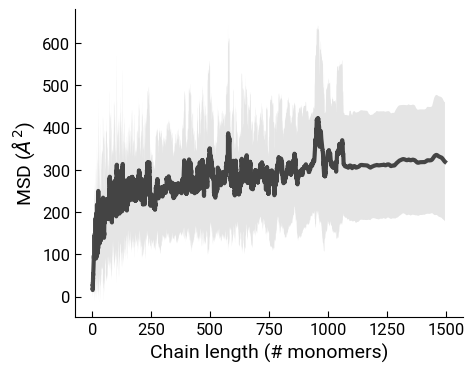

In [42]:
#MSD x chain length

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
RUNS = ["run1","run2","run3"]
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
MOL = "DMS"
NFRAMES = 500
LOAD = True

fig, ax = plt.subplots(figsize=(5,4))

Ls = []
MSDs = []
for den in DENS:

    for nrep in NREPS:

        for run in RUNS:
            system = f"{nrep},{den},{run}"
            if not LOAD:
                filenames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*start*.gro"))
                trajnames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*nojump*.xtc"))

                MySys = Grafting.NewSystem(gro=filenames[-1], traj=trajnames[-1])
                u = MySys.universe
                xmin = u.atoms.positions[:,0].min()
                xmax = u.atoms.positions[:,0].max()
                df_pos_all, df_pos_close, df_msd_time =  MySys.calc_MSD(polyname=MOL, nframes=NFRAMES, frange=[xmin,xmax], distFromLayer=10,)
                df_pos_close.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{system}.dat", index=False)
                df_pos_all.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{system}.dat", index=False)
            else:
                MySys = Grafting.NewSystem()
                df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{system}.dat")
                df_pos_close = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{system}.dat")

            df_pos_close["length"] = df_pos_close["resname"].apply(lambda x: int(x[1:]))

            MSD = df_pos_close["MSD"]
            L = df_pos_close["length"]
            Ls.extend(L)
            MSDs.extend(MSD)

sorted_data = sorted(zip(Ls, MSDs), key=lambda x: x[0])
df = pd.DataFrame(sorted_data, columns=["length","MSD"])
roll = df[["length","MSD"]].rolling(window=int(len(df)/200), min_periods=10, closed="both").mean()
std = df[["length","MSD"]].rolling(window=int(len(df)/200), min_periods=10, closed="both").std()

ax.plot(roll["length"], roll["MSD"], color="k", label=nrep, lw=3, alpha=0.7)
ax.fill_between(roll["length"], roll["MSD"]-std["MSD"], roll["MSD"]+std["MSD"], edgecolor="none", facecolor="k", alpha=0.1)

stylize_plot(ax,"Chain length (# monomers)","MSD ($\\AA^2$)")
fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSDxChainLength.svg", dpi=350, bbox_inches='tight')
fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSDxChainLength.png", dpi=350, bbox_inches='tight')


# SASA

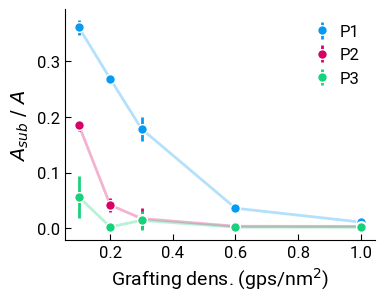

In [34]:
def calc_SASA(SOLV, NREPS, DENS, RUNS, FILENAME, append=False):
    if append:
        SASAs = append
    else:
        SASAs = {}
    for NREP in NREPS:
        SASAs[NREP] = []
        out = []
        for DEN in DENS:
            areas = []
            areas_norm = []
            for RUN in RUNS:
                try:
                    df = pd.read_csv(f"{ROOT}/SASA/{SOLV}/{NREP}/{DEN}/{RUN}/{FILENAME}.xvg", skiprows=25, header=None, sep="\s+", names=["time","tot","area"]).dropna()
                except:
                    continue
                if df.empty:
                    continue

                #df.to_csv(f"{ROOT}/out_files/roughness/SASA_{NREP},{DEN},{RUN},{SOLV}.dat", index=False)
                areas_norm.append(df["area"].mean()/(1104.891))
                areas.append(df["area"].mean())
                out.append([DEN, df["area"].mean()/(1104.891), df["area"].std()/(1104.891), df["area"].mean(), df["area"].std(), RUN])

            area_norm_mean = np.mean(areas_norm)
            area_norm_std = np.std(areas_norm)
            area_mean = np.mean(areas)
            area_std = np.std(areas)
            SASAs[NREP].append([DEN, area_norm_mean, area_norm_std, area_mean, area_std])

        dfsave = pd.DataFrame(out, columns=["dens","area_norm","std_area_norm","area","std_area","run"])
        dfsave.to_csv(f"{ROOT}/out_files/roughness/{FILENAME}_{NREP}_{SOLV}.csv", index=False)
    return SASAs

fig,ax = plt.subplots(figsize=(4,3))
SOLV = "water"

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1","run2","run3","run4"]
SASAs = calc_SASA(SOLV, NREPS, DENS, RUNS, "SASA")

'''ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS = ["50","100"]
DENS = [0.3,0.6,1.0]
RUNS = ["run1"]
SASAs = calc_SASA(SOLV, NREPS, DENS, RUNS, "SASA", append=SASAs)
'''

NREPS_ALL = ["K0","K2","K5","50","100"]
MARKERS = {"50":"^","100":"^","K0":"o","K1":"o","K2":"o","K5":"o"}
for NREP in NREPS:
    SASAs[NREP] = np.array(SASAs[NREP])
    ax.plot(SASAs[NREP][:,0], SASAs[NREP][:,1], lw=2, color=COLOR_NREP[f"{NREP}"], ls="-",alpha=0.3)
    ax.errorbar(SASAs[NREP][:,0], SASAs[NREP][:,1],  SASAs[NREP][:,2], label=NREP.replace("K0","P1").replace("K2","P2").replace("K5","P3").replace("50","M50").replace("100","M100"), lw=2, color=COLOR_NREP[f"{NREP}"], ls="none", marker=MARKERS[NREP], ms=7, mec="white", mfc=COLOR_NREP[f"{NREP}"])

    df = pd.DataFrame(SASAs[NREP], columns=["dens","area_norm","std_area_norm","area","std_area"])
    #df.to_csv(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/out_files/roughness/SASA_{NREP}_{SOLV}.dat", index=False)
stylize_plot(ax,"Grafting dens. (gps/nm$^2$)", "$A_{sub} \ / \ A$")
ax.legend(frameon=False, ncol=1, columnspacing=1, handlelength=0.5, fontsize=12)
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/roughness/SASA_{SOLV}_sub_nomono.svg", dpi=350, bbox_inches="tight")


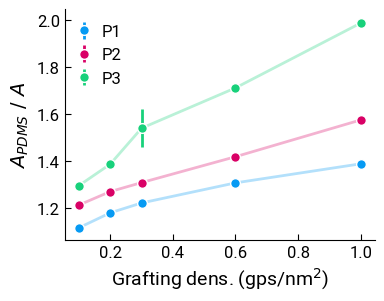

In [38]:
fig,ax = plt.subplots(figsize=(4,3))
SOLV = "water"

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1","run2","run3"]
SASAs = calc_SASA(SOLV, NREPS, DENS, RUNS, "SASA_DMS_smallprobe")

NREPS_ALL = ["K0","K2","K5"]
MARKERS = {"K0":"o","K1":"o","K2":"o","K5":"o"}
for NREP in NREPS_ALL:
    SASAs[NREP] = np.array(SASAs[NREP])
    ax.plot(SASAs[NREP][:,0], SASAs[NREP][:,1], lw=2, color=COLOR_NREP[f"{NREP}"], ls="-",alpha=0.3)
    ax.errorbar(SASAs[NREP][:,0], SASAs[NREP][:,1],  SASAs[NREP][:,2], label=NREP.replace("50","M50").replace("100","M100").replace("K0","P1").replace("K2","P2").replace("K5","P3"), lw=2, color=COLOR_NREP[f"{NREP}"], ls="none", marker=MARKERS[NREP], ms=7, mec="white", mfc=COLOR_NREP[f"{NREP}"])

    df = pd.DataFrame(SASAs[NREP], columns=["dens","area_norm","std_area_norm","area","std_area"])
    #df.to_csv(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/out_files/roughness/SASA_DMS_{NREP}_{SOLV}.dat", index=False)
stylize_plot(ax,"Grafting dens. (gps/nm$^2$)", "$A_{PDMS} \ / \ A$")
ax.legend(frameon=False, ncol=1, columnspacing=1, handlelength=0.5, fontsize=12)
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/roughness/SASA_DMS_smallprobe_{SOLV}.svg", dpi=350, bbox_inches="tight")


# Topographical x Chemical roughness

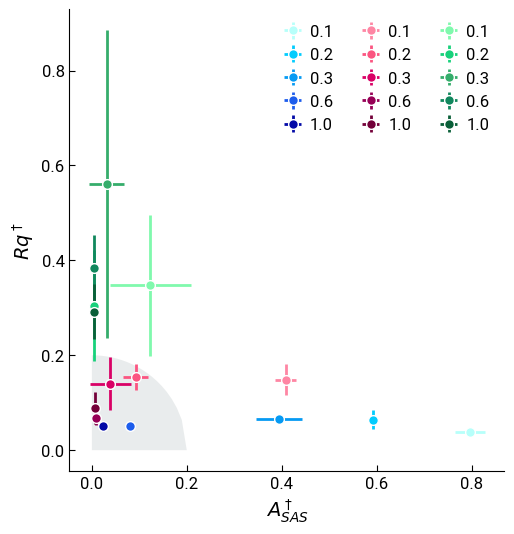

In [246]:
#SASA x Roughness

COLOR_GRADIENT = {"K0,0.1":"xkcd:pale cyan", "K0,0.2":"xkcd:bright sky blue", "K0,0.3":"xkcd:azure", "K0,0.6":"xkcd:azul", "K0,1.0":"xkcd:cobalt blue",
                "K1,0.1":"xkcd:pale gold", "K1,0.2":"xkcd:golden yellow", "K1,0.3":"xkcd:yellowish orange", "K1,0.6":"xkcd:pumpkin orange", "K1,1.0":"xkcd:dark orange",
                "K2,0.1":"xkcd:rosa", "K2,0.2":"xkcd:warm pink", "K2,0.3":"xkcd:dark hot pink", "K2,0.6":"xkcd:dark magenta", "K2,1.0":"xkcd:merlot",
                "K5,0.1":"xkcd:seafoam", "K5,0.2":"xkcd:seaweed", "K5,0.3":"xkcd:seaweed green", "K5,0.6":"xkcd:dark sea green", "K5,1.0":"xkcd:spruce",
                "50,0.3":"xkcd:silver", "50,0.6":"xkcd:gray", "50,1.0":"xkcd:black",
                "100,0.3":"xkcd:lavender", "100,0.6":"xkcd:plum", "100,1.0":"xkcd:plum"}

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0", "K2", "K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1","run2","run3"]
SOLV = "water"

fig,ax = plt.subplots(figsize=(6,6))

dfs = {}
normRough = 0
for NREP in NREPS:
    SASAs = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_{NREP}_{SOLV}.csv")
    Roughs = pd.read_csv(f"{ROOT}/out_files/roughness/roughness_{NREP}_{SOLV}.csv")

    dfs[NREP] = pd.merge(SASAs, Roughs, on="dens")
    if dfs[NREP]["roughness"].max() > normRough:
        normRough = dfs[NREP]["roughness"].max()
      
for NREP in NREPS:
    SASAs = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_{NREP}_{SOLV}.csv")
    Rqs = pd.read_csv(f"{ROOT}/out_files/roughness/roughness_{NREP}_{SOLV}.csv")
    Rqs["roughness"] = Rqs["roughness"]/normRough
    for DEN in DENS:

        mean_SASA, mean_Rq = [], []
        for RUN in RUNS:
            SASA = SASAs[(SASAs["dens"]==DEN) & (SASAs["run"]==RUN)]
            Rq = Rqs[(Rqs["dens"]==DEN) & (Rqs["run"]==RUN)]

            mean_SASA.append(SASA["area"].mean())
            mean_Rq.append(Rq["roughness"].mean())

                
        ax.errorbar(np.mean(mean_SASA), np.mean(mean_Rq), xerr=np.std(mean_SASA), yerr=np.std(mean_Rq), marker="o", ls="none", lw=2, color=COLOR_GRADIENT[f"{NREP},{DEN}"],
                    label=f"{DEN}", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], mec="white", ms=7)
        #df.to_csv(f"{ROOT}/out_files/roughness/SASA_roughness_{NREP}_{SOLV}.csv", index=False)

ax.legend(frameon=False, ncol=3, columnspacing=2, handlelength=0.5, fontsize=12)

radius = 0.2
x = np.linspace(0,radius,20)
y = lambda x: np.sqrt(radius**2 - x**2)
ax.fill_between(x,0,y(x), color="xkcd:cool grey", alpha=0.2, edgecolor="none")
ax.set_aspect("equal") 

stylize_plot(ax,"$A^\dagger_{SAS}$","$Rq^\dagger$")
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/roughnessSASA_roughness_{SOLV}.svg", dpi=350, bbox_inches="tight")

In [ ]:
#SASA x Roughness

COLOR_GRADIENT = {"K0,0.1":"xkcd:pale cyan", "K0,0.2":"xkcd:bright sky blue", "K0,0.3":"xkcd:azure", "K0,0.6":"xkcd:azul", "K0,1.0":"xkcd:cobalt blue",
                "K1,0.1":"xkcd:pale gold", "K1,0.2":"xkcd:golden yellow", "K1,0.3":"xkcd:yellowish orange", "K1,0.6":"xkcd:pumpkin orange", "K1,1.0":"xkcd:dark orange",
                "K2,0.1":"xkcd:rosa", "K2,0.2":"xkcd:warm pink", "K2,0.3":"xkcd:dark hot pink", "K2,0.6":"xkcd:dark magenta", "K2,1.0":"xkcd:merlot",
                "K5,0.1":"xkcd:seafoam", "K5,0.2":"xkcd:seaweed", "K5,0.3":"xkcd:seaweed green", "K5,0.6":"xkcd:dark sea green", "K5,1.0":"xkcd:spruce",
                "50,0.3":"xkcd:silver", "50,0.6":"xkcd:gray", "50,1.0":"xkcd:black",
                "100,0.3":"xkcd:lavender", "100,0.6":"xkcd:plum", "100,1.0":"xkcd:plum"}

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0", "K2", "K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1","run2","run3"]
SOLV = "water"

fig,ax = plt.subplots(figsize=(6,6))

dfs = {}
      
for NREP in NREPS:
    SASAs = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_{NREP}_{SOLV}.csv")
    Rqs = pd.read_csv(f"{ROOT}/out_files/roughness/roughness_{NREP}_{SOLV}.csv")

    df = pd.merge(SASAs.sort_values(by=["dens","run"]), Rqs.sort_values(by=["dens","run"]), on=["dens","run"])
    df.to_csv(f"{ROOT}/out_files/roughness/SASA_roughness_{NREP}_{SOLV}.csv", index=False)

    data = []
    for DEN in DENS:
        SASA = SASAs[SASAs["dens"]==DEN]["area"].values
        Rq = Rqs[Rqs["dens"]==DEN]["roughness"].values
                
        ax.scatter(SASA, Rq, marker="o", color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{NREP},{DEN}")
        data.append([DEN, SASA[0], Rq[0]])
    


handles = [plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=COLOR_GRADIENT[f"{nrep},{den}"], label=f"{nrep},{den}") for nrep in NREPS for den in DENS]
labels = [f"{nrep},{den}" for nrep in NREPS for den in DENS]

ax.legend(handles=handles, labels=labels, frameon=False, ncol=3, columnspacing=2, handlelength=0.5, fontsize=12)


stylize_plot(ax,"Chemical roughness","Topographical roughness")
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/roughnessSASA_roughness_{SOLV}.svg", dpi=350, bbox_inches="tight")

# Reduced Graf Dens

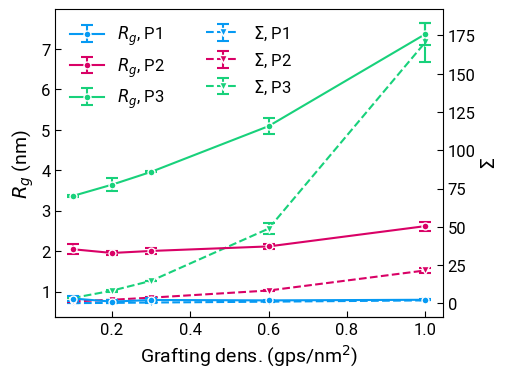

In [4]:
def extract_sequences(arr):
    sequences = []
    current_sequence = []

    for i in range(len(arr)):
        if i > 0 and arr[i] != arr[i - 1] + 1:
            sequences.append(current_sequence)
            current_sequence = []

        current_sequence.append(arr[i])

    # Append the last sequence
    if current_sequence:
        sequences.append(current_sequence)

    return sequences

def calc_gyr(NFRAMES, ROOT, SYSTEM):
    NREP, DEN, RUN, SOLV = SYSTEM.split(",")
    gros = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*start*.gro"))
    trajs = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*nojump*.xtc"))
    molSizes = pd.read_csv(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/molSizes.dat", names=["length"])

    MySys = Grafting.NewSystem(gro=gros[-1], traj=trajs[-1], molSizes=molSizes["length"].values)
    u = MySys.universe
    poly = u.select_atoms(f"name DMS")
    for atom in poly:
        atom.mass = 72
    resnames = list(set(poly.residues.resnames))

    Rg_run = []
    for ts in u.trajectory[-NFRAMES:]:

        for resname in resnames:
            indices = poly.select_atoms(f"resname {resname}").indices
            sequence = extract_sequences(indices)

            for seq in sequence:
                monomers = poly.select_atoms(f"index {seq[0]}:{seq[-1]}")
                Rg = monomers.radius_of_gyration()
                Rg_run.append(Rg*.1)    

    return Rg_run

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
RUNS = ["run1","run2","run3"]
NREPS = ["K0","K2","K5"]
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3", "50":"M50", "100":"M100"}
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
MOL = "DMS"
NFRAMES = 20
LOAD_RG = True
LOAD_SIGMA = True

fig, ax = plt.subplots(figsize=(5,4))
twax = ax.twinx()
twax.set_zorder(1)
ax.set_zorder(2)
ax.patch.set_visible(False)

for NREP in NREPS:
    means, stds = [], []
    
    Rgs = []
    for DEN in DENS:
        
        if not LOAD_RG:
            for RUN in RUNS:
                SYSTEM = f"{NREP},{DEN},{RUN},{SOLV}"
                Rg_run = calc_gyr(NFRAMES, ROOT, SYSTEM)
                Rgs.append([DEN, np.mean(Rg_run), np.std(Rg_run)/np.sqrt(NFRAMES), RUN])

    if not LOAD_RG:
        df = pd.DataFrame(Rgs, columns=["dens","Rg","std_Rg","run"])
        df.to_csv(f"{ROOT}/out_files/roughness/Rg_{NREP}_{SOLV}.csv", index=False)
    else:
        df = pd.read_csv(f"{ROOT}/out_files/roughness/Rg_{NREP}_{SOLV}.csv")

    if not LOAD_SIGMA:
        df["sigma"] = df["Rg"]**2 * np.pi * df["dens"]
        df["std_sigma"] = df["sigma"]* 2 * df["std_Rg"]/df["Rg"]
        df.to_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}.csv", index=False)
    else:
        df = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}.csv")
    
    sigmamean = df[["dens","sigma"]].groupby("dens").mean()["sigma"]
    sigmastd = df[["dens","sigma"]].groupby("dens").std()["sigma"]
    Rgmean = df[["dens","Rg"]].groupby("dens").mean()["Rg"]
    Rgstd = df[["dens","Rg"]].groupby("dens").std()["Rg"]

    #twax.plot(DENS, sigmamean, color=COLOR_NREP[NREP], marker="none", ls="-", lw=2, alpha=0.5)
    #twax.fill_between(DENS, sigmamean-sigmastd, sigmamean+sigmastd, color=COLOR_NREP[NREP], edgecolor="none", alpha=0.2)
    #ax.plot(DENS, Rgmean, color=COLOR_NREP[NREP], marker="none", ls="-.", lw=2, alpha=0.5)
    #ax.fill_between(DENS, Rgmean-Rgstd, Rgmean+Rgstd, color=COLOR_NREP[NREP], edgecolor="none", alpha=0.2)

    ax.errorbar(DENS, Rgmean, Rgstd, marker="o", ms=5, ls="-", c=COLOR_NREP[NREP], mfc=COLOR_NREP[NREP], mec="white", label=f"$R_g$, {SAMPLE[NREP]}", capsize=4, capthick=1.5)
    twax.errorbar(DENS, sigmamean, sigmastd, marker="v", ms=6, ls="--", c=COLOR_NREP[NREP], mfc=COLOR_NREP[NREP], mec="white", label=f"$\Sigma$, {SAMPLE[NREP]}", capsize=4, capthick=1.5)
    #twax.errorbar(df["dens"], df["sigma"], df["std_sigma"], mec="white", mfc=COLOR_NREP[NREP], marker="^", ls="none", lw=2,
    #c=COLOR_NREP[NREP], label=f"$\Sigma$, {SAMPLE[NREP]}", capsize=3, capthick=1.5)
    #ax.errorbar(df["dens"], df["Rg"], df["std_Rg"], marker="o", mec="white", mfc=COLOR_NREP[NREP], ls="none", lw=2, 
    #c=COLOR_NREP[NREP], label=f"$R_g$, {SAMPLE[NREP]}", capsize=3, capthick=1.5)
 
ax.legend(frameon=False, fontsize=12, loc="upper left", handlelength=2)
twax.legend(frameon=False, fontsize=12, loc="upper center", handlelength=2)
stylize_plot(ax,"Grafting dens. (gps/nm$^2$)","$R_g$ (nm)", hide=["top","right"], ticks={"left":True, "top":False, "right":False, "bottom":True})
stylize_plot(twax,"","$\Sigma$", hide=["left"], ticks={"left":False, "top":False, "right":True, "bottom":False})

fig.savefig(f"{ROOT}/plots/roughness/Rg_sigma_{SOLV}.svg", dpi=350, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/roughness/Rg_sigma_{SOLV}.png", dpi=350, bbox_inches="tight")

0.1
0.2
0.3
0.6
1.0
0.1
0.2
0.3
0.6
1.0
0.1
0.2
0.3
0.6
1.0


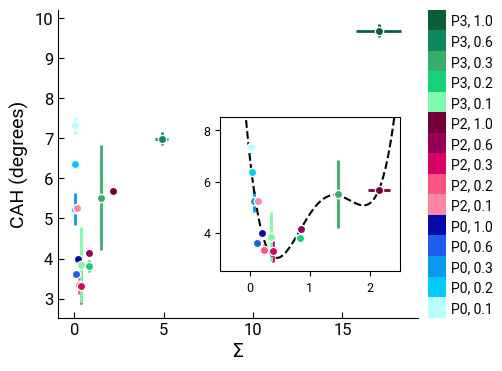

In [31]:
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit

SAMPLES = ["P0","P2","P3"]
# Create a colormap from the colors
colors = [COLOR_GRADIENT[f"{NREP},{DEN}"] for NREP in NREPS for DEN in DENS]
labels = [f"{SAMPLE}, {DEN}" for SAMPLE in SAMPLES for DEN in DENS]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Define the quadratic function
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3", "50":"M50", "100":"M100"}
RUNS = ["run1","run2","run3"]
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
CAs = {"Bare":75, "PDMS":110, "std_BARE":1, "std_PDMS":2}

fig,ax = plt.subplots(figsize=(5,4))
x1, x2, y1, y2 = -0.5, 2.5, 2.5, 8.5  # subregion of the original image
axins = ax.inset_axes([0.45, 0.15, 0.5, 0.5], xlim=(x1, x2), ylim=(y1, y2))
axins.set_yticks([4,6,8])
axins.set_xticks([0,1,2])
axins.set_yticklabels([4,6,8], size=9)
axins.set_xticklabels([0,1,2], size=9)

rscores, variables = [], []
A_floor = 1104.891
variable = "sigma"


for NREP in NREPS:
    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
    SASA_sub = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_{NREP}_{SOLV}.csv")
    SASA_poly = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_DMS_smallprobe_{NREP}_{SOLV}.csv")
    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}.csv")

    df_rough = SIG.merge(THICK, on=["dens","run"])
    df_rough["Rscore"] = 1/2 * SASA_sub["area"]/A_floor * np.abs( (np.cos(CAs["Bare"]* np.pi/180) - np.cos(CAs["PDMS"]* np.pi/180)) ) + 1/2 * (SASA_poly["area"] - A_floor)/A_floor * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))

    for DEN in DENS:
        print(DEN)
        dfp = df_rough[df_rough["dens"]==DEN]
        dfmean = dfp[["dens","thickness","sigma","Rscore"]].groupby("dens")
        ax.errorbar(dfmean[variable].mean()*0.1,  dfmean["Rscore"].mean()*180/np.pi, yerr=dfmean["Rscore"].std()*180/np.pi, xerr=dfmean[variable].std()*0.1, lw=2, ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=6)

        axins.errorbar(dfmean[variable].mean()*0.1,  dfmean["Rscore"].mean()*180/np.pi, yerr=dfmean["Rscore"].std()*180/np.pi, xerr=dfmean[variable].std()*0.1, lw=2, ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=6)


        #ax.errorbar(dfp[variable],  dfp["Rscore"]*180/np.pi, xerr=dfp[f"std_{variable}"], lw=2, 
        #            ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN"], label=f"{SAMPLE[NREP]}, {DEN}", ms=6)

        variables.extend(dfmean[variable].mean()*0.1)
        rscores.extend(dfmean["Rscore"].mean()*180/np.pi)  
    #ax.plot(pts[:,0],pts[:,1], lw=2, color=COLOR_NREP[NREP], ls="-", alpha=0.5)



# Define a polynomial function of degree 4
def poly(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

def exp_quad(x, a, b, c, d, e):
    return a * np.exp(-b * x *5) + c * x**2 + d * x + e

def gaussian_exp(x, A, mu, sigma, B, k):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) - B * np.exp(-k * x)

# Fit the polynomial to the data
#params, covariance = curve_fit(gaussian_exp, variables, rscores, p0=[1,1,1,1,1])


# Fit the polynomial to the data
variables = np.array(variables)
rscores = np.array(rscores)
mask = variables < 3

coefficients = np.polyfit(variables[mask], rscores[mask], 4)

# Generate points for plotting the fitted curve
x_fit = np.linspace(-1, 3, 500)
y_fit = np.polyval(coefficients, x_fit)


axins.plot(x_fit, y_fit, ls="--", color="black")


#ax.legend(frameon=False, ncols=3, fontsize=10, loc="lower right", framealpha=0.6, facecolor="white", edgecolor="none", handlelength=0.1, columnspacing=1)
stylize_plot(ax,f"{variable}".replace("thickness","Thickness").replace("sigma","$\Sigma$"),r"CAH (degrees)")

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size="5%", pad=0.1)

cbar = fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', shrink=0.8, ticks=np.arange(len(colors))+0.5)
cbar.ax.set_yticklabels(labels, ha='left')
cbar.ax.tick_params(which='both', size=0)
cbar.outline.set_edgecolor('none')

fig.savefig(f"{ROOT}/plots/roughness/{variable}_roughness_{SOLV}.svg", dpi=350, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/roughness/{variable}_roughness_{SOLV}.png", dpi=350, bbox_inches="tight")

0.1
0.2
0.3
0.6
1.0
0.1
0.2
0.3
0.6
1.0
0.1
0.2
0.3
0.6
1.0


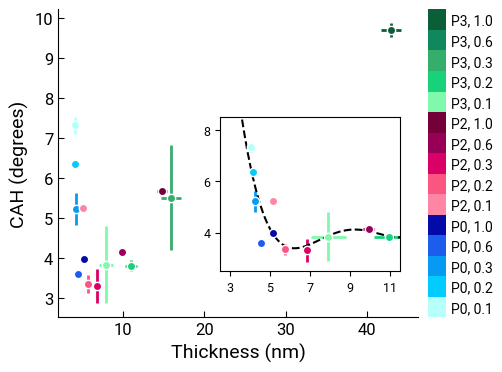

In [30]:
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit

SAMPLES = ["P0","P2","P3"]
# Create a colormap from the colors
colors = [COLOR_GRADIENT[f"{NREP},{DEN}"] for NREP in NREPS for DEN in DENS]
labels = [f"{SAMPLE}, {DEN}" for SAMPLE in SAMPLES for DEN in DENS]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3", "50":"M50", "100":"M100"}
RUNS = ["run1","run2","run3"]
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
CAs = {"Bare":75, "PDMS":110, "std_BARE":1, "std_PDMS":2}

fig,ax = plt.subplots(figsize=(5,4))
x1, x2, y1, y2 = 2.5, 11.5, 2.5, 8.5  # subregion of the original image
axins = ax.inset_axes([0.45, 0.15, 0.5, 0.5], xlim=(x1, x2), ylim=(y1, y2))
axins.set_yticks([4,6,8])
axins.set_xticks([3,5,7,9,11])
axins.set_yticklabels([4,6,8], size=9)
axins.set_xticklabels([3,5,7,9,11], size=9)

rscores, variables = [], []
A_floor = 1104.891
variable = "thickness"


for NREP in NREPS:
    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
    SASA_sub = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_{NREP}_{SOLV}.csv")
    SASA_poly = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_DMS_smallprobe_{NREP}_{SOLV}.csv")
    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}.csv")

    df_rough = SIG.merge(THICK, on=["dens","run"])
    df_rough["Rscore"] = 1/2 * SASA_sub["area"]/A_floor * np.abs( (np.cos(CAs["Bare"]* np.pi/180) - np.cos(CAs["PDMS"]* np.pi/180)) ) + 1/2 * (SASA_poly["area"] - A_floor)/A_floor * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))

    for DEN in DENS:
        print(DEN)
        dfp = df_rough[df_rough["dens"]==DEN]
        dfmean = dfp[["dens","thickness","sigma","Rscore"]].groupby("dens")
        ax.errorbar(dfmean[variable].mean()*0.1,  dfmean["Rscore"].mean()*180/np.pi, yerr=dfmean["Rscore"].std()*180/np.pi, xerr=dfmean[variable].std()*0.1, lw=2, ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=6)

        axins.errorbar(dfmean[variable].mean()*0.1,  dfmean["Rscore"].mean()*180/np.pi, yerr=dfmean["Rscore"].std()*180/np.pi, xerr=dfmean[variable].std()*0.1, lw=2, ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=6)


        #ax.errorbar(dfp[variable],  dfp["Rscore"]*180/np.pi, xerr=dfp[f"std_{variable}"], lw=2, 
        #            ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN"], label=f"{SAMPLE[NREP]}, {DEN}", ms=6)

        variables.extend(dfmean[variable].mean()*0.1)
        rscores.extend(dfmean["Rscore"].mean()*180/np.pi)  
    #ax.plot(pts[:,0],pts[:,1], lw=2, color=COLOR_NREP[NREP], ls="-", alpha=0.5)


# Fit the polynomial to the data
variables = np.array(variables)
rscores = np.array(rscores)
mask = variables < 13

coefficients = np.polyfit(variables[mask], rscores[mask], 4)

# Generate points for plotting the fitted curve
x_fit = np.linspace(-1, 15, 500)
y_fit = np.polyval(coefficients, x_fit)

axins.plot(x_fit, y_fit, ls="--", color="black")


#ax.legend(frameon=False, ncols=3, fontsize=10, loc="lower right", framealpha=0.6, facecolor="white", edgecolor="none", handlelength=0.1, columnspacing=1)
stylize_plot(ax,f"{variable} (nm)".replace("thickness","Thickness").replace("sigma","$\Sigma$"),r"CAH (degrees)")

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size="5%", pad=0.1)

cbar = fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', shrink=0.8, ticks=np.arange(len(colors))+0.5)
cbar.ax.set_yticklabels(labels, ha='left')
cbar.ax.tick_params(which='both', size=0)
cbar.outline.set_edgecolor('none')

fig.savefig(f"{ROOT}/plots/roughness/{variable}_roughness_{SOLV}.svg", dpi=350, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/roughness/{variable}_roughness_{SOLV}.png", dpi=350, bbox_inches="tight")

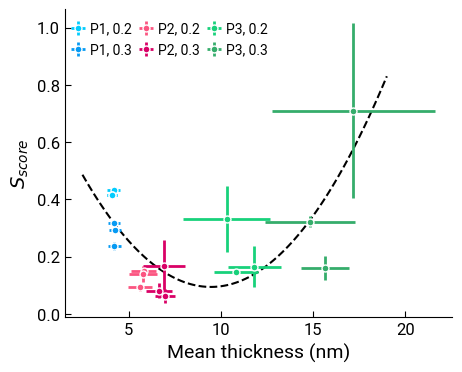

In [232]:
from scipy.optimize import curve_fit

# Define the quadratic function
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3", "50":"M50", "100":"M100"}
RUNS = ["run1","run2","run3"]
NREPS = ["K0","K2","K5"]
DENS = [0.2,0.3]
SOLV = "water"

fig,ax = plt.subplots(figsize=(5,4))

thicks, roughs = [], []
norm_SASA, norm_rough = 0, 0
for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_roughness_{NREP}_{SOLV}.csv")
    norm_rough = df["roughness"].max() if df["roughness"].max() > norm_rough else norm_rough

for NREP in NREPS:
    ROUGH = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_roughness_{NREP}_{SOLV}.csv")
    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
    #SIGs = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}.csv")

    df_rough = pd.merge(ROUGH, THICK, on=["dens","run"])
    df_rough["roughness"] = df_rough["roughness"]/norm_rough
    df_rough["std_roughness"] = df_rough["std_roughness"]/norm_rough
    
    x = df_rough["roughness"]
    y = df_rough["area"]

    df_rough["rtot"] = np.sqrt(1/2) * np.sqrt(x**2 + y**2)
    df_rough["rtot"] = df_rough["rtot"]

    delta_x = df_rough["std_roughness"]
    delta_y = df_rough["std_area"]

    # Expression
    f = np.sqrt(1/2) * np.sqrt(x**2 + y**2)
    # Error propagation
    partial_df_dx = x / np.sqrt(2 * (x**2 + y**2))
    partial_df_dy = y / np.sqrt(2 * (x**2 + y**2))
    delta_f = np.sqrt((partial_df_dx * delta_x)**2 + (partial_df_dy * delta_y)**2)
    df_rough["std_rtot"] = delta_f


    for DEN in DENS:
        dfp = df_rough[df_rough["dens"]==DEN]
        ax.errorbar(dfp["thickness"]*.1,  dfp["rtot"], xerr=dfp["std_thickness"]*.1, yerr=dfp["std_rtot"], lw=2, 
                    ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], 
                    label=f"{SAMPLE[NREP]}, {DEN}", ms=5)
        thicks.extend(dfp["thickness"].values*.1)
        roughs.extend(dfp["rtot"].values)
        
    #ax.plot(pts[:,0],pts[:,1], lw=2, color=COLOR_NREP[NREP], ls="-", alpha=0.5)


# Define the function to fit
def curve(x, a1, b1, c1):
    return a1 * x**2 + b1 * x + c1

x = np.linspace(2.5,19,100)

popt, _ = curve_fit(curve, thicks, roughs)
ax.plot(x, curve(x, *popt), c="k", ls="--", zorder=-5)


ax.legend(frameon=False, ncols=3, fontsize=10, loc="upper left", framealpha=0.6, facecolor="white", edgecolor="none", handlelength=0.1, columnspacing=1)
stylize_plot(ax,"Mean thickness (nm)","$S_{score}$")

fig.savefig(f"{ROOT}/plots/roughness/thickness_roughness_{SOLV}.svg", dpi=350, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/roughness/thickness_roughness_{SOLV}.png", dpi=350, bbox_inches="tight")

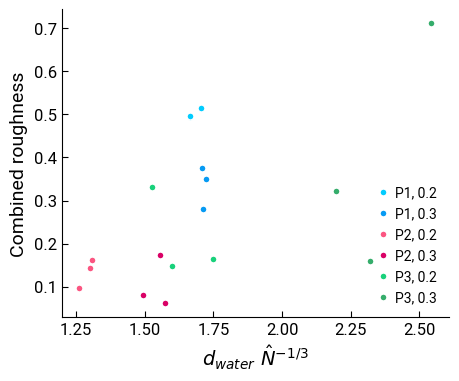

In [121]:
N = { "K0":15, "K1":72, "K2":88, "K5":308 }

from scipy.optimize import curve_fit

# Define the quadratic function
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3", "50":"M50", "100":"M100"}
RUNS = ["run1","run2","run3"]
NREPS = ["K0","K2","K5"]
DENS = [0.2,0.3]
SOLV = "water"

fig,ax = plt.subplots(figsize=(5,4))

thicks, roughs = [], []
norm_SASA, norm_rough = 0, 0
for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_roughness_{NREP}_{SOLV}.csv")
    norm_SASA = df["area"].max() if df["area"].max() > norm_SASA else norm_SASA
    norm_rough = df["roughness"].max() if df["roughness"].max() > norm_rough else norm_rough

for NREP in NREPS:
    ROUGH = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_roughness_{NREP}_{SOLV}.csv")
    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
    #SIGs = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}.csv")

    df_rough = pd.merge(ROUGH, THICK, on=["dens","run"])
    df_rough["area"] = df_rough["area"]/norm_SASA
    df_rough["std_area"] = df_rough["std_area"]/norm_SASA
    df_rough["roughness"] = df_rough["roughness"]/norm_rough
    
    x = df_rough["roughness"]
    y = df_rough["area"]

    df_rough["std_roughness"] = 0
    df_rough["rtot"] = np.sqrt(1/2) * np.sqrt(x**2 + y**2)
    df_rough["rtot"] = df_rough["rtot"]


    for DEN in DENS:
        dfp = df_rough[df_rough["dens"]==DEN]
        ax.errorbar(dfp["thickness"]*.1*N[NREP]**(-1.0/3.0),  dfp["rtot"], lw=2, 
                    ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], 
                    label=f"{SAMPLE[NREP]}, {DEN}", ms=5)
        thicks.extend(dfp["thickness"].values*.1)
        roughs.extend(dfp["rtot"].values)
        


ax.legend(frameon=False, ncols=1, fontsize=10, loc="lower right", framealpha=0.6, facecolor="white", edgecolor="none", handlelength=0.1, columnspacing=1)
stylize_plot(ax,"$d_{water} \ \hat{N}^{-1/3}$","$S_{score}$")

fig.savefig(f"{ROOT}/plots/roughness/thickness_roughness_{SOLV}.svg", dpi=350, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/roughness/thickness_roughness_{SOLV}.png", dpi=350, bbox_inches="tight")

# CAH

Adding kernels: 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]


15.0
0.0


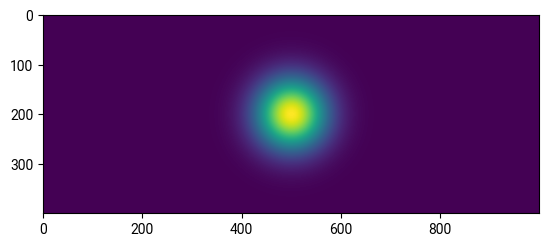

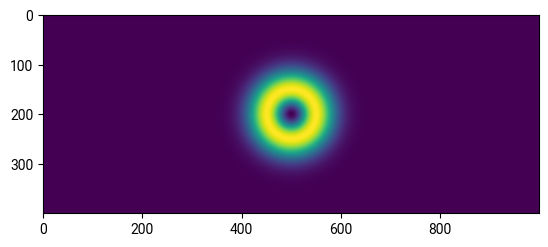

Zeroleng was  399.0


  4%|▍         | 1260/30000 [00:22<08:43, 54.85it/s]

In [4]:
from MDAnalysis.transformations import wrap
import cmasher as cmr
from mpl_toolkits.axes_grid1 import make_axes_locatable


def hist2D(root,nrep,den,run,solv,mol,nframes):

    print(f"{root}/{nrep}/{den}/{run}/{solv}")
    gro = natsorted(glob(f"{root}/{nrep}/{den}/{run}/{solv}/nvt/*part*.gro"))[-1]
    traj = natsorted(glob(f"{root}/{nrep}/{den}/{run}/{solv}/nvt/*part*.xtc"))[-1]

    sample = Grafting.NewSystem(gro=gro, traj=traj)
    u = sample.universe
    transform = wrap(u.atoms)
    u.trajectory.add_transformations(transform)
    u.trajectory[-1]
    DMS = u.select_atoms(f"name {mol}", updating=True)

    positions = []
    for ts in u.trajectory[-nframes:]:
        positions.extend(DMS.positions)

    positions = np.array(positions)
    hist, xedges, yedges = get_hist2D(positions)
    df = pd.DataFrame(hist)
    df.to_csv(f"{root}/out_files/density_profiles/height_{nrep}_{den}_{run}.csv", index=False)

    return hist, xedges, yedges

def get_hist2D(positions):
    x,y,z = positions[:,0]*.1, positions[:,1]*.1, positions[:,2]*.1

    num_bins_y = 200
    num_bins_x = 200

    # Create 2D histogram of the data
    H, xedges, yedges = np.histogram2d(x, y, bins=(num_bins_x, num_bins_y), weights=z)
    max_indices = np.unravel_index(np.argmax(H, axis=None), H.shape)
    H_max = np.zeros((num_bins_x, num_bins_y))

    # Assign the maximum z value to the corresponding bin
    for i in range(num_bins_x):
        for j in range(num_bins_y):
            z_values_in_bin = z[(x >= xedges[i]) & (x < xedges[i+1]) & (y >= yedges[j]) & (y < yedges[j+1])]
            if len(z_values_in_bin) > 0:
                H_max[i, j] = np.max(z_values_in_bin)

    return H_max.T, xedges, yedges


import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors


def genimageSINGLE(N, M, num_kernels, maxhi):
    # Initialize
    num_kernels=1
    image = np.zeros((N, M))
    
    def add_kernel(image, kernel, x0, y0, size_x, size_y, amplitude, N, M):
        for dx in range(-size_x//2, size_x//2):
            for dy in range(-size_y//2, size_y//2):
                image[(x0+dx)%N, (y0+dy)%M] += amplitude * kernel[dx+size_x//2, dy+size_y//2]
        return image
    
    
    # Add Gaussian kernels
    for _ in tqdm(range(num_kernels), desc='Adding kernels'):
        # Create a discrete Gaussian kernel
        sigma_x = 50. #np.random.binomial(50,0.7) #max(maxmax,np.random.geometric(.1))  # Width in x direction
        sigma_y = 50. #np.random.binomial(70,0.8) #max(maxmax,np.random.geometric(.1))  # Width in y direction
        size_x = int(10*sigma_x)  # Size of the kernel in x direction, 6 sigma rule
        size_y = int(10*sigma_y)  # Size of the kernel in y direction, 6 sigma rule
        size = max(size_x, size_y)
        size_x = size
        size_y = size
        x, y = np.meshgrid(np.linspace(-size_x//2, size_x//2, size_x), np.linspace(-size_y//2, size_y//2, size_y))
        kernel = np.exp(-((x)**2 / (2 * sigma_x**2 + 1e-7) + (y)**2 / (2 * sigma_y**2 + 1e-7)))  # Add a small constant to prevent division by zero
    
        # Normalize the kernel
        kernel /= kernel.sum()
    
        # Position
        #x0, y0 = np.random.randint(int(N/3.), int((2./3.)*N), 2)
        x0, y0 = [int(N/2), int(M/2)] #np.random.randint(int(0), int(N), 2)

        #y0=int(y0*(float(M)/float(N)))
        #print(x0)
    
        # Amplitude
        amplitude = np.random.uniform(0.1, 1)
    
        # Add the kernel to the image with periodic boundary conditions
        image = add_kernel(image, kernel, x0, y0, size_x, size_y, amplitude, N, M)
        
    image /= image.max()
    image -= image.min()
    # normalization
    image /= image.max()
    image = image*maxhi
    return image


# Compute partial derivatives
pixelspacing=1

def compute_partial_derivatives(image, N, M):
    dx = np.zeros_like(image)
    dy = np.zeros_like(image)

    # Compute ∂/∂x
    for i in range(N):
        for j in range(M):
            dx[i, j] = (image[(i+1) % N, j] - image[(i-1) % N, j]) / (2 * pixelspacing)

    # Compute ∂/∂y
    for i in range(N):
        for j in range(M):
            dy[i, j] = (image[i, (j+1) % M] - image[i, (j-1) % M]) / (2 * pixelspacing)

    return dx, dy

def plot_function_and_interface(f, interface):
    plt.imshow(f, origin='lower', extent=[0, f.shape[1], 0, f.shape[0]], aspect='auto')
    plt.plot(interface, np.arange(f.shape[0]), 'r-')
    plt.colorbar(label='f(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function and Interface')
    plt.show()

def compute_integral(f, interface):
    integral = 0.0
    for i in range(f.shape[0]):
        for j in range(interface[i]):
            integral += f[i, j]
    return integral*(pixelspacing*pixelspacing)

def compute_length(interface):
    # Compute the slope of the interface using finite differences
    slope = np.diff(interface)/pixelspacing
    
    # Compute the length of the interface
    length = np.sum(np.sqrt(1 + slope**2))*pixelspacing
    
    return length

def perturb_interface(interface, f, cooling_rate , T_initial, low_temperature, N, kappa):
    best_interface = interface.copy()
    zeroleng = compute_length(interface)
    best_integral = compute_integral(f, interface) + kappa*(compute_length(interface)-zeroleng)*(compute_length(interface)-zeroleng)
    last_integral = best_integral
    zeroleng = compute_length(interface)
    print("Zeroleng was ",zeroleng)

    # Define the cooling rate
    cooling_rate = 1. # no cooling 0.999

    T = T_initial
    bestiteration=1
    for iteration in tqdm(range(N)):  
        i1, i2 = np.random.choice(len(interface), 2, replace=False)

        new_interface = best_interface.copy()
        new_interface[i1] -= 1
        new_interface[i2] += 1 

        # Compute the new integral
        new_integral = compute_integral(f, new_interface) + kappa*(compute_length(new_interface)-zeroleng)*(compute_length(new_interface)-zeroleng)

        # Metropolis acceptance criterion
        if new_integral < best_integral or np.random.rand() < np.exp((last_integral - new_integral) / T):
            interface = new_interface
            last_integral = new_integral
            #if new_integral < best_integral:
            bestiteration=iteration
            best_integral = new_integral
            best_interface = new_interface

        ## Decrease the temperature for the first N/2 steps, then keep it low
        #if iteration < N / 2:
        #    T *= cooling_rate
        #else:
        #    T = low_temperature
    
    print(bestiteration)

    return best_interface


sys_dict = {"root":"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse", "nrep":"K5", "den":0.3, "run":"run4", "solv":"vacuum", "mol":"DMS", "nframes":10}
root = sys_dict["root"]
#h, xedges, yedges = hist2D(**sys_dict)
#h = pd.read_csv(f"{root}/out_files/density_profiles/height_K5_0.3_run4.csv").to_numpy()
#N, M = 200, 200

# Generate the function
N = 400  # Number of rows
M = 1000  # Number of columns
num_gaussians = 100

h = genimageSINGLE(N+2, M+2, num_gaussians, 1)*15.
dx, dy = compute_partial_derivatives(h, N, M)

print(h.max())

h=h[0:-2,0:-2]
dx=dx[0:-2,0:-2]
dy=dy[0:-2,0:-2]

f=np.sqrt(1+(dx*dx + dy*dy))-np.ones_like(dx)

print(np.min(f))

plt.imshow(h, cmap='viridis')
plt.show()
plt.imshow(f, cmap='viridis')
plt.show()


# Initialize the interface
randominterface=np.random.randint(0, M, size=N)
ratio = 0.47
interface = np.ones_like(randominterface)*int(ratio*M)

# Compute the integral and perturb the interface
crate=0.9999
best_interface = perturb_interface(interface, f, crate,  2., 2., 30000, kappa=1e-2)


# Plot the function and interface
plot_function_and_interface(f, best_interface)
plot_function_and_interface(h, best_interface)




# MD + Experiments

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as pe

from Experiments import ImageFuncs


def params_adh(size):
    return {'interpolation':'bessel', 'extent':[0, size, 0, size], 'aspect':1,
                   'vmin':-1, 'vmax':5}

def params_jumpin(size):
    return {'interpolation':'bessel', 'extent':[0, size, 0, size], 'aspect':1,
                   'vmin':-1, 'vmax':1}

scan_unit = 'nm'
scalebar_settings = {500:{'size':20, 'label':f'20 {scan_unit}', 'loc':'lower right', 
                        'pad':0.3, 'color':'white', 'frameon':False, 'size_vertical':500/30},
                    1000:{'size':200, 'label':f'200 {scan_unit}', 'loc':'lower right', 
                        'pad':0.3, 'color':'white', 'frameon':False, 'size_vertical':1000/30},
                    'MD':{'size':20, 'label':f'20 {scan_unit}', 'loc':'lower right', 
                         'pad':0.3, 'color':'white', 'frameon':False, 'size_vertical':80/30},
                    'zoom': {'size':20, 'label':f'20 {scan_unit}', 'loc':'lower right', 
                         'pad':0.3, 'color':'black', 'frameon':False, 'size_vertical':200/30, 'fontproperties':{'size':8}}}

jump_in_dict = {1000:{'K5':np.load(f'Experiments/PDMS_140323_Krumpfer_10kcSt_1000nm_spot3.003/jump_in.npy'),
                    'K4':np.load(f'Experiments/PDMS_140323_Krumpfer_350cSt_1000nm_spot3.005/jump_in.npy'),
                    'K2':np.load(f'Experiments/PDMS_140323_Krumpfer_50cSt_1000nm_spot3.004/jump_in.npy'),
                    'K0':np.load(f'Experiments/PDMS_140323_Krumpfer_20cSt_1000nm_spot3.006/jump_in.npy')},
                500:{'K5':np.load(f'Experiments/PDMS_140323_Krumpfer_10kcSt_500nm_spot1.001//jump_in.npy'),
                    'K4':np.load(f'Experiments/PDMS_140323_Krumpfer_350cSt_500nm_spot1.001//jump_in.npy'),
                    'K2':np.load(f'Experiments/PDMS_140323_Krumpfer_50cSt_500nm_spot2.003//jump_in.npy'),
                    'K0':np.load(f'Experiments/PDMS_140323_Krumpfer_20cSt_500nm_spot2.004//jump_in.npy')}}

adh_dict = {1000:{'K5':np.load(f'Experiments/PDMS_140323_Krumpfer_10kcSt_1000nm_spot3.003/retracts_adhesion.npy'),
                    'K4':np.load(f'Experiments/PDMS_140323_Krumpfer_350cSt_1000nm_spot3.005/retracts_adhesion.npy'),
                    'K2':np.load(f'Experiments/PDMS_140323_Krumpfer_50cSt_1000nm_spot3.004/retracts_adhesion.npy'),
                    'K0':np.load(f'Experiments/PDMS_140323_Krumpfer_20cSt_1000nm_spot3.006/retracts_adhesion.npy')},
            500:{'K5':np.load(f'Experiments/PDMS_140323_Krumpfer_10kcSt_500nm_spot1.001//retracts_adhesion.npy'),
                    'K4':np.load(f'Experiments/PDMS_140323_Krumpfer_350cSt_500nm_spot1.001//retracts_adhesion.npy'),
                    'K2':np.load(f'Experiments/PDMS_140323_Krumpfer_50cSt_500nm_spot2.003//retracts_adhesion.npy'),
                    'K0':np.load(f'Experiments/PDMS_140323_Krumpfer_20cSt_500nm_spot2.004//retracts_adhesion.npy')}}


from MDAnalysis.transformations import wrap
import cmasher as cmr

def hist2D(root,nrep,den,run,solv,mol,nframes):

    print(f"{root}/{nrep}/{den}/{run}/{solv}")
    gro = natsorted(glob(f"{root}/{nrep}/{den}/{run}/{solv}/nvt/*part*.gro"))[-1]
    traj = natsorted(glob(f"{root}/{nrep}/{den}/{run}/{solv}/nvt/*part*.xtc"))[-1]

    sample = Grafting.NewSystem(gro=gro, traj=traj)
    u = sample.universe
    transform = wrap(u.atoms)
    u.trajectory.add_transformations(transform)
    u.trajectory[-1]
    DMS = u.select_atoms(f"name {mol}", updating=True)

    positions = []
    for ts in u.trajectory[-nframes:]:
        positions.extend(DMS.positions)

    positions = np.array(positions)
    hist, xedges, yedges = get_hist2D(positions)
    df = pd.DataFrame(hist)
    df.to_csv(f"{root}/out_files/density_profiles/height_{nrep}_{den}_{run}.csv", index=False)

    return hist, xedges, yedges

def get_hist2D(positions):
    x,y,z = positions[:,0]*.1, positions[:,1]*.1, positions[:,2]*.1
    #x,y,z = np.append(x,x), np.append(y,y+10), np.append(z,z)
    #av_z = np.mean(z)

    num_bins_y = 150
    num_bins_x = 150

    # Create 2D histogram of the data
    H, xedges, yedges = np.histogram2d(x, y, bins=(num_bins_x, num_bins_y), weights=z)
    max_indices = np.unravel_index(np.argmax(H, axis=None), H.shape)
    H_max = np.zeros((num_bins_x, num_bins_y))

    # Assign the maximum z value to the corresponding bin
    for i in range(num_bins_x):
        for j in range(num_bins_y):
            z_values_in_bin = z[(x >= xedges[i]) & (x < xedges[i+1]) & (y >= yedges[j]) & (y < yedges[j+1])]
            if len(z_values_in_bin) > 0:
                H_max[i, j] = np.max(z_values_in_bin)

    #fig1, ax1 = plt.subplots()
    #sns.kdeplot(H_max.T.flatten(), fill=True, legend=False, ax=ax1)

    return H_max.T, xedges, yedges

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_single_image(fig, ax, data, bounds=None, rel_bounds=False, top_right_text='', top_left_text='', cbar_label=False, ar=1, print_median_value=False, scale_bar_size=None, imparams={}, scalebar_settings={}, spines=False, cbar=True):

    av_height = np.median(data)
    if bounds:
        if rel_bounds:
            imparams['vmin']  = bounds[0] + av_height
            imparams['vmax']  = bounds[1] + av_height
        else:
            imparams['vmin']  = bounds[0]
            imparams['vmax']  = bounds[1]


    im=ax.imshow(data, **imparams)
    scalebar = AnchoredSizeBar(ax.transData, **scalebar_settings)
    ax.add_artist(scalebar)

    if not spines:
        ax.set_axis_off()
    
    ax.text(s=top_left_text,x=0,y=1.01, transform=ax.transAxes, va='bottom', size=7)
    ax.text(s=top_right_text,x=1,y=1.01, transform=ax.transAxes, va='bottom', ha='right', size=7)

    if print_median_value:
        ax.text(s=f"median value: {np.round(av_height,2)}",x=1,y=0.99, transform=ax.transAxes, va='top', ha='right', size=7,
               color='white')
    
    if cbar:
        make_colorbar(fig, ax, im, label=cbar_label)


def make_colorbar(fig, ax, img, where='top', label=False):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes(where, size='5%', pad=0.03)
    cbar = fig.colorbar(img, cax=cax, orientation='horizontal', location='top')

    if label:
        cbar.ax.set_xlabel(label, size=8)
    cbar.ax.tick_params(which='both', size=1, labelsize=8, pad=0.1)
    cbar.outline.set_edgecolor('none')

    return cax, cbar
    

sys_dict = {"root":"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse", "nrep":"", "den":0.3, "run":"", "solv":"vacuum", "mol":"DMS", "nframes":3}
nreps = ["K0","K2","K5"]
runs = ["run4","run4","run4"]
LOAD = True

/gpfs/scratch/ehpc13/Fabio/.venv/lib64/python3.9/site-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/gpfs/scratch/ehpc13/Fabio/.venv/lib64/python3.9/site-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/gpfs/scratch/ehpc13/Fabio/.venv/lib64/python3.9/site-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


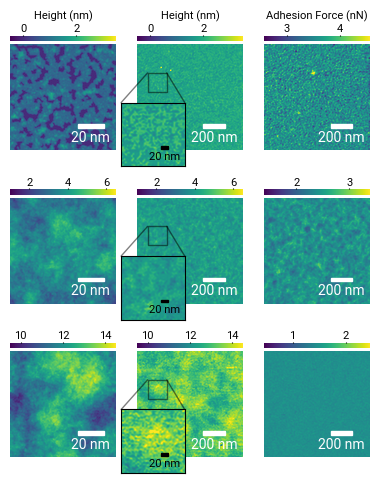

In [34]:
import random

# Function to rotate the image randomly by 90, 180, or 270 degrees
def random_rotate(image):
    rotations = [1, 2, 3]  # Corresponds to 90, 180, 270 degrees
    rotation_choice = random.choice(rotations)
    rotated_image = np.rot90(image, k=rotation_choice)
    return rotated_image

fig, axes = plt.subplots(3,3, figsize=(4,5), gridspec_kw={'width_ratios':[1,1,1], 'height_ratios':[1,1,1]})
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.9, hspace=0.3, wspace=0.2)

axesMD = axes[:,0]
axesAFM = axes[:,1]
axesADH = axes[:,2]
samples = ['K0','K2','K5']
bounds = {'K0':[-0.5,3.5], 'K2':[1,6.5], 'K5':[9.5,14.5]}

for sample,axMD,axAFM,axADH in zip(samples,axesMD,axesAFM,axesADH):

    if sample == 'K0':
        cbar_label_afm = 'Height (nm)'
        cbar_label_adh = 'Adhesion Force (nN)'
    else:
        cbar_label_afm = False
        cbar_label_adh = False


    if not LOAD:
        sys_dict['nrep'] = sample
        sys_dict['run'] = 'run4'
        print(sys_dict)
        hist, xedges, yedges = hist2D(**sys_dict)
    else:
        root = sys_dict["root"]
        den = sys_dict["den"]
        hist = pd.read_csv(f"{root}/out_files/density_profiles/height_{sample}_{den}_run4.csv").to_numpy()
        hist = np.where(hist != 0, hist - 3.5, hist)

    #histfull = np.array([np.array([hist]*2).reshape(300,150).T]*2).reshape(300,300)
    #print(histfull.shape)

    # Plot the surface from above
    imMD = axMD.imshow(hist, extent=[0,80,0,80], origin='lower', aspect='equal', cmap='viridis', interpolation="bessel", vmin=bounds[sample][0], vmax=bounds[sample][1])
    axMD.set_axis_off()
    scalebar = AnchoredSizeBar(axMD.transData, **scalebar_settings['MD'])
    axMD.add_artist(scalebar)
    make_colorbar(fig, axMD, imMD, where='top', label=cbar_label_afm)

    size_jumpin = 1000
    jump_in_img = ImageFuncs.flatten(jump_in_dict[size_jumpin][sample], retain_magnitude=True)
    imAFM = plot_single_image(fig=fig, ax=axAFM, data=jump_in_img, bounds=bounds[sample], rel_bounds=False, cbar_label=cbar_label_afm, imparams=params_jumpin(size_jumpin), scalebar_settings=scalebar_settings[size_jumpin])

    adh_img = ImageFuncs.flatten(adh_dict[1000][sample], retain_magnitude=True)
    imADH = plot_single_image(fig=fig, ax=axADH, data=adh_img, bounds=[-1,1], rel_bounds=True, cbar_label=cbar_label_adh, imparams=params_adh(1000), scalebar_settings=scalebar_settings[1000])

    # inset Axes....
    x1, x2, y1, y2 = 100, 280, 550, 730  # subregion of the original image
    axins = axAFM.inset_axes([-0.15, -0.15, 0.6, 0.6], xlim=(x1, x2), ylim=(y1, y2), xticks=[], yticks=[], xticklabels=[], yticklabels=[])
    plot_single_image(fig=fig, ax=axins, data=jump_in_img, bounds=bounds[sample], rel_bounds=False, imparams=params_jumpin(size_jumpin), scalebar_settings=scalebar_settings['zoom'], spines=True, cbar=False)

    axAFM.indicate_inset_zoom(axins, edgecolor="black")

fig.savefig(f'{root}/plots/colormaps.svg', dpi=500)
fig.savefig(f'{root}/plots/colormaps.png', dpi=500)
